In [182]:
!pip3 install networkx

     |████████████████████████████████| 1.9 MB 1.9 MB/s eta 0:00:01
You should consider upgrading via the '/Users/fatineboujnouni/Desktop/data-workshop/venv/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# PART I : Data Analysis of the Factory elements

## I - Parts : Equipments and Components
- An equipment is a part number for which there exists at least one occurence in the Requirement table as a heading part number.
- A component is a part number for which there exists at least one occurence in the Requirement table as a child part number.

In [2]:
# Read all factory data
parts = pd.read_csv('data/parts.csv', index_col=0)
requirements = pd.read_csv('data/requirements.csv', index_col=0)
work_orders = pd.read_csv('data/work_orders.csv', index_col=0)
customer_orders = pd.read_csv('data/customer_orders.csv', index_col=0)
purchase_orders = pd.read_csv('data/purchase_orders.csv', index_col=0)
initial_stock = pd.read_csv('data/initial_stock.csv', index_col=0)

In [3]:
requirements.head()

heading_part_number  child_part_number  quantity
0               232434              67382         1
1               232434              87329         4
2               232434             782332         3
3               232434              37832         2
4               547235              67382         1

In [204]:
parts.head()

part_number  part_name
0        38783    BOLT 17
1       983298     RING 4
2      9237832    SHAFT 9
3       187281  SHAFT 112
4       239832    SHAFT 7

### Q1 : What is the list of equipments ? And what are the requirements for each equipment ?


In [4]:
# Prepare a dataframe with the heading_part_name and child_part_name from the dataframes : requirements and parts

equipements_and_components = requirements.copy()

# Add heading part name
equipements_and_components= equipements_and_components.merge(parts, left_on=['heading_part_number'], right_on=['part_number'], right_index=False, left_index=False)
equipements_and_components = equipements_and_components.drop(columns=['part_number']).rename(columns={"part_name":"heading_part_name"})

# Add child part name
equipements_and_components = equipements_and_components.merge(parts, left_on=['child_part_number'], right_on=['part_number'], right_index=False, left_index=False)
equipements_and_components = equipements_and_components.drop(columns=['part_number']).rename(columns={"part_name":"child_part_name"})

equipements_and_components.head()

heading_part_number  child_part_number  quantity heading_part_name  \
0               232434              67382         1  AERO GEARBOX A-1   
1               547235              67382         1  AERO GEARBOX A-2   
2               986756              67382         5  AERO GEARBOX A-3   
3               232434              87329         4  AERO GEARBOX A-1   
4               232434              87329         4  AERO GEARBOX A-1   

  child_part_name  
0        SCREW 12  
1        SCREW 12  
2        SCREW 12  
3       NEEDLE X1  
4         BOLT 21

In [5]:
# List of equipments
equipment_names = [equipement for equipement in equipements_and_components.heading_part_name.unique()]
equipment_names

['AERO GEARBOX A-1',
 'AERO GEARBOX A-2',
 'AERO GEARBOX A-3',
 'HORIZONTAL STABILIZER GB-1',
 'HORIZONTAL STABILIZER GB-2',
 'GEAR SHAFT AB-1']

In [6]:
# List of equipments
component_names = [component for component in equipements_and_components.child_part_name.unique()]
component_names

['SCREW 12',
 'NEEDLE X1',
 'BOLT 21',
 'SHAFT 1',
 'SHAFT 3',
 'SHAFT 2',
 'SHAFT 4',
 'BOLT 22',
 'SHAFT 7',
 'SHAFT 9',
 'RING 3',
 'RING 4',
 'SHAFT 19',
 'BOLT 15',
 'NEEDLE X2',
 'SHAFT 21',
 'BOLT 17',
 'SHAFT 112',
 'RING 139',
 'BEARING 2',
 'BEARING 4']

In [205]:
# Requirements for each equipment
for equipement in equipment_names:
    print("Requirements for Equipment  : ", equipement)
    print(equipements_and_components[equipements_and_components.heading_part_name==equipement])

Requirements for Equipment  :  AERO GEARBOX A-1
    heading_part_number  child_part_number  quantity heading_part_name  \
0                232434              67382         1  AERO GEARBOX A-1   
3                232434              87329         4  AERO GEARBOX A-1   
4                232434              87329         4  AERO GEARBOX A-1   
9                232434             782332         3  AERO GEARBOX A-1   
10               232434              37832         2  AERO GEARBOX A-1   

   child_part_name  
0         SCREW 12  
3        NEEDLE X1  
4          BOLT 21  
9          SHAFT 1  
10         SHAFT 3  
Requirements for Equipment  :  AERO GEARBOX A-2
    heading_part_number  child_part_number  quantity heading_part_name  \
1                547235              67382         1  AERO GEARBOX A-2   
5                547235              87329         4  AERO GEARBOX A-2   
6                547235              87329         4  AERO GEARBOX A-2   
11               547235            78

### Q2 : What are the components that are required for the construction of 2 or more equipments ?


In [8]:
# Group by component
nbr_equipement_per_component = equipements_and_components[['heading_part_name', 'child_part_name']].groupby('child_part_name').count()
nbr_equipement_per_component

heading_part_name
child_part_name                   
BEARING 2                        1
BEARING 4                        1
BOLT 15                          1
BOLT 17                          1
BOLT 21                          3
BOLT 22                          1
NEEDLE X1                        3
NEEDLE X2                        1
RING 139                         1
RING 3                           2
RING 4                           2
SCREW 12                         3
SHAFT 1                          1
SHAFT 112                        1
SHAFT 19                         1
SHAFT 2                          1
SHAFT 21                         1
SHAFT 3                          1
SHAFT 4                          1
SHAFT 7                          1
SHAFT 9                          1

In [9]:
# Component used by more than 2 equipments
component_used_by_more_than_2_eq = nbr_equipement_per_component[nbr_equipement_per_component.heading_part_name>=2]
component_used_by_more_than_2_eq

heading_part_name
child_part_name                   
BOLT 21                          3
NEEDLE X1                        3
RING 3                           2
RING 4                           2
SCREW 12                         3

### Q3 : Plot a graph in order to visualize each Equipment and its corresponding Components

La bibliothèque `NetworkX` en Python est utilisée pour la création, la manipulation et l'analyse de graphes et de réseaux. Elle offre des fonctionnalités pour créer des graphes, ajouter des nœuds et des arêtes, calculer des métriques de réseau, effectuer des opérations de recherche de chemins, générer des graphes aléatoires, et bien plus encore.

La fonction `from_pandas_edgelist` est une fonction de la bibliothèque NetworkX en Python. Elle permet de créer un graphe NetworkX à partir d'un DataFrame Pandas contenant une liste d'arêtes (edges) du graphe.

Cette fonction prend en entrée un DataFrame Pandas avec au moins deux colonnes, représentant les nœuds source et destination de chaque arête. Vous pouvez également spécifier une colonne supplémentaire pour les attributs des arêtes.

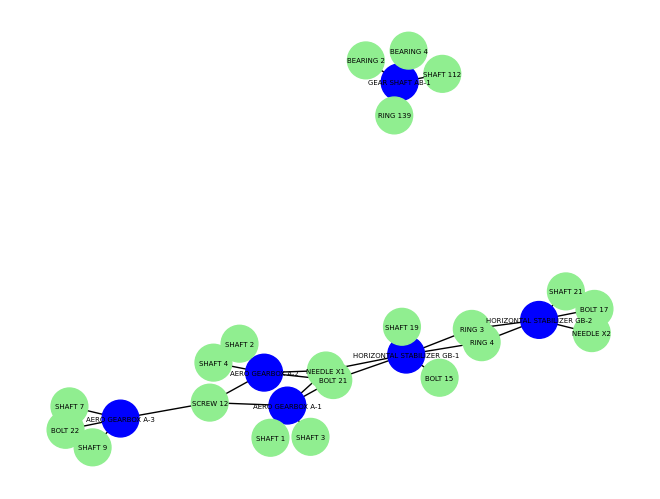

In [10]:
# Prepare graphs
equipements_and_components_network = nx.from_pandas_edgelist(equipements_and_components, source='heading_part_name', target='child_part_name')

# Add node colors
colors = []
for node in equipements_and_components_network:
    if node in equipements_and_components['heading_part_name'].values:
        colors.append('blue')
    else:
        colors.append('lightgreen')

# draw graph
nx.draw(equipements_and_components_network, with_labels=True, node_color=colors, node_size=700, font_size=5)

## II - Orders - Customer Orders, Work Orders, Purchase Orders

### Q5 : What is the number of customer orders per part ? What is the maximum and minimum due date ?

 Préparer une nouvelle DataFrame contenant les informations agrégées pour chaque valeur unique de la colonne "part_number". Le colonnes d'aggrégations :

-  "part_number" : Les différentes valeurs de la colonne "part_number" pour lesquelles les agrégations ont été effectuées.
-  "customer_order_number_count" : Le nombre total de commandes de clients pour chaque valeur de "part_number".
- "due_date_min" : La date d'échéance minimale parmi toutes les commandes pour chaque "part_number".
- "due_date_max" : La date d'échéance maximale parmi toutes les commandes pour chaque "part_number".
- "quantity_sum" : La somme totale des quantités commandées pour chaque "part_number".

### Q6 : Which parts have customers orders ?

### Q7 : What is the number of work orders per part ? What is the maximum and minimum release date ?

### Q8 : Which parts have work orders ?


#### Q9 : What is the number of purchase orders per part ? What is the maximum and minimum delivery date ?

In [13]:
purchase_orders_per_equipments = purchase_orders.groupby('part_number').agg({"purchase_order_number": ["count"], 'delivery_date': ["min", "max"], 'quantity': ["sum"]})
purchase_orders_per_equipments

purchase_order_number        delivery_date                       \
                            count                  min                  max   
part_number                                                                   
37832                           7  2023-03-06 09:05:41  2023-07-04 21:03:32   
38783                           3  2023-03-10 12:02:27  2023-07-10 09:57:03   
67382                           7  2023-01-09 11:08:05  2023-06-07 04:28:38   
87329                           6  2023-01-29 22:04:18  2023-07-05 21:44:29   
87823                           3  2023-01-17 21:20:29  2023-08-06 20:13:58   
98329                           9  2023-01-05 15:53:39  2023-08-19 23:28:24   
187281                          5  2023-01-11 12:47:17  2023-07-23 08:15:31   
239832                         10  2023-01-26 06:15:47  2023-08-21 17:24:41   
778732                          8  2023-02-19 05:41:50  2023-07-22 14:01:21   
782332                          6  2023-03-02 10:51:28  2023-07-02 08:38:28   
832983                          6  2023-01-03 00:36:35  2023-06-25 09:01:43   
873282                          1  2023-02-27 10:50:42  2023-02-27 10:50:42   
873833                          8  2023-01-24 17:12:37  2023-08-18 03:04:31   
873872                          4  2023-02-10 10:43:50  2023-08-26 20:11:54   
983298                          6  2023-03-14 15:02:36  2023-07-06 19:14:46   
983983                          6  2023-01-02 20:27:44  2023-05-27 16:08:19   
987842                          8  2023-01-23 05:41:53  2023-06-30 01:59:44   
3298932                        10  2023-03-06 11:22:33  2023-08-06 16:56:10   
7838732                         6  2023-01-27 09:37:01  2023-06-26 14:49:36   
9237832                         5  2023-03-05 14:11:23  2023-08-29 08:57:35   

            quantity  
                 sum  
part_number           
37832             46  
38783             10  
67382             30  
87329             35  
87823             20  
98329             43  
187281            23  
239832            52  
778732            29  
782332            18  
832983            37  
873282             3  
873833            46  
873872            17  
983298            46  
983983            38  
987842            56  
3298932           57  
7838732           29  
9237832           29

#### Q10 : Which parts have purchase orders ?

## III - Data  Vizualisation : Events plot

#### Q11 : Can you plot on an timeline  work/purchase/customer orders events per parts ?

1 - Préparer une dataframe comprenants tous les événements d'une part.

La dataframe cible doit avoir les colonnes suivantes :

[part_number, part_name, order_number, quantity, date, event_type]

In [14]:
# All parts work orders
all_parts_work_orders = parts.merge(work_orders, on='part_number')

# Drop the unnecessary columns
all_parts_work_orders = all_parts_work_orders.drop(columns=["unit_price", "status", "lead_time"]).rename(columns={'work_order_number': "order_number", 'release_date': 'date'})

# Name the event type
all_parts_work_orders['event_type'] = "WO"
all_parts_work_orders

part_number                   part_name  order_number  quantity  \
0        232434            AERO GEARBOX A-1        752682         1   
1        232434            AERO GEARBOX A-1        275098         1   
2        232434            AERO GEARBOX A-1        292340         1   
3        232434            AERO GEARBOX A-1        602748         1   
4        547235            AERO GEARBOX A-2        884668         1   
5        547235            AERO GEARBOX A-2        583820         1   
6        547235            AERO GEARBOX A-2         80517         1   
7        547235            AERO GEARBOX A-2         63091         1   
8        547235            AERO GEARBOX A-2        486240         1   
9        986756            AERO GEARBOX A-3         76941         1   
10      7358645  HORIZONTAL STABILIZER GB-1        755765         1   
11      7358645  HORIZONTAL STABILIZER GB-1         48696         1   
12      7358645  HORIZONTAL STABILIZER GB-1        640011         1   
13       845343  HORIZONTAL STABILIZER GB-2        770356         1   
14       845343  HORIZONTAL STABILIZER GB-2        500493         1   
15       765465             GEAR SHAFT AB-1         73033         1   
16       765465             GEAR SHAFT AB-1        583069         1   
17       765465             GEAR SHAFT AB-1        463816         1   
18       765465             GEAR SHAFT AB-1        647543         1   
19       765465             GEAR SHAFT AB-1         36369         1   

                   date event_type  
0   2023-03-20 17:47:58         WO  
1   2023-02-22 01:44:17         WO  
2   2023-06-16 14:30:16         WO  
3   2023-04-07 19:33:36         WO  
4   2023-04-16 12:39:57         WO  
5   2023-04-15 18:07:39         WO  
6   2023-06-20 08:53:42         WO  
7   2023-01-13 12:33:27         WO  
8   2023-06-24 19:10:40         WO  
9   2023-06-04 19:21:02         WO  
10  2023-01-10 23:34:26         WO  
11  2023-05-31 05:52:01         WO  
12  2023-06-05 03:23:37         WO  
13  2023-01-01 09:23:57         WO  
14  2023-04-19 09:20:57         WO  
15  2023-02-13 14:49:48         WO  
16  2023-02-20 09:42:00         WO  
17  2023-04-13 08:50:24         WO  
18  2023-02-04 00:34:09         WO  
19  2023-06-17 19:17:18         WO

In [15]:
all_parts_purchase_orders = parts.merge(purchase_orders, on='part_number')
all_parts_purchase_orders
all_parts_purchase_orders = all_parts_purchase_orders.rename(columns={'purchase_order_number': "order_number", 'delivery_date': 'date'})
all_parts_purchase_orders['event_type'] = "PO"
all_parts_purchase_orders

part_number part_name  order_number                 date  quantity  \
0          38783   BOLT 17         96596  2023-03-10 12:02:27         4   
1          38783   BOLT 17        810830  2023-07-10 09:57:03         4   
2          38783   BOLT 17        527148  2023-04-03 05:22:38         2   
3         983298    RING 4        383027  2023-03-14 17:03:58         9   
4         983298    RING 4         17449  2023-04-19 00:40:17         3   
..           ...       ...           ...                  ...       ...   
125        67382  SCREW 12        163867  2023-02-23 17:56:38         3   
126       873872  RING 139         28575  2023-04-17 23:24:41         5   
127       873872  RING 139         75408  2023-08-26 20:11:54         6   
128       873872  RING 139         99590  2023-02-10 10:43:50         4   
129       873872  RING 139        522413  2023-04-02 07:05:49         2   

    event_type  
0           PO  
1           PO  
2           PO  
3           PO  
4           PO  
..         ...  
125         PO  
126         PO  
127         PO  
128         PO  
129         PO  

[130 rows x 6 columns]

In [16]:
all_parts_customer_orders = parts.merge(customer_orders, on='part_number')
all_parts_customer_orders
all_parts_customer_orders = all_parts_customer_orders.rename(columns={'customer_order_number': "order_number", 'due_date': 'date'})
all_parts_customer_orders['event_type'] = "CO"
all_parts_customer_orders

part_number                   part_name  order_number  quantity  \
0        232434            AERO GEARBOX A-1          7878         1   
1        232434            AERO GEARBOX A-1        670606         1   
2        547235            AERO GEARBOX A-2        587602         1   
3        547235            AERO GEARBOX A-2        850728         1   
4        547235            AERO GEARBOX A-2        678194         1   
5        547235            AERO GEARBOX A-2        519025         1   
6        547235            AERO GEARBOX A-2        677094         1   
7        986756            AERO GEARBOX A-3        966315         1   
8       7358645  HORIZONTAL STABILIZER GB-1        675950         2   
9       7358645  HORIZONTAL STABILIZER GB-1        654991         2   
10       845343  HORIZONTAL STABILIZER GB-2        859170         2   
11       845343  HORIZONTAL STABILIZER GB-2        279824         2   
12       845343  HORIZONTAL STABILIZER GB-2        446178         2   
13       845343  HORIZONTAL STABILIZER GB-2        726648         2   
14       765465             GEAR SHAFT AB-1        111845         1   

                   date event_type  
0   2023-10-16 14:24:33         CO  
1   2023-06-28 06:23:52         CO  
2   2023-06-16 07:03:59         CO  
3   2023-08-16 19:04:04         CO  
4   2023-11-08 07:50:47         CO  
5   2023-09-12 22:16:18         CO  
6   2023-08-07 19:58:51         CO  
7   2023-10-03 11:03:07         CO  
8   2023-11-17 04:24:11         CO  
9   2023-09-09 16:18:16         CO  
10  2023-09-29 02:25:31         CO  
11  2023-10-20 18:58:28         CO  
12  2023-07-28 05:00:47         CO  
13  2023-08-26 03:06:18         CO  
14  2023-06-14 00:53:40         CO

In [17]:
# Concaténer tous les événements dans une dataframe
all_parts_events = pd.concat([all_parts_purchase_orders, all_parts_customer_orders, all_parts_work_orders])

In [18]:
all_parts_events

part_number        part_name  order_number                 date  quantity  \
0         38783          BOLT 17         96596  2023-03-10 12:02:27         4   
1         38783          BOLT 17        810830  2023-07-10 09:57:03         4   
2         38783          BOLT 17        527148  2023-04-03 05:22:38         2   
3        983298           RING 4        383027  2023-03-14 17:03:58         9   
4        983298           RING 4         17449  2023-04-19 00:40:17         3   
..          ...              ...           ...                  ...       ...   
15       765465  GEAR SHAFT AB-1         73033  2023-02-13 14:49:48         1   
16       765465  GEAR SHAFT AB-1        583069  2023-02-20 09:42:00         1   
17       765465  GEAR SHAFT AB-1        463816  2023-04-13 08:50:24         1   
18       765465  GEAR SHAFT AB-1        647543  2023-02-04 00:34:09         1   
19       765465  GEAR SHAFT AB-1         36369  2023-06-17 19:17:18         1   

   event_type  
0          PO  
1          PO  
2          PO  
3          PO  
4          PO  
..        ...  
15         WO  
16         WO  
17         WO  
18         WO  
19         WO  

[165 rows x 6 columns]

2 - Préparer la fonction qui déssine les événements par part

In [21]:
def plot_all_part_events(event_df, part_name):
    # Selectionner les évenements de 'part_name'
    part_events = event_df[event_df.part_name==part_name]

    # Convertir la colonne 'date' au type datetime
    part_events['date'] = pd.to_datetime(part_events['date'])

    # Trier les événements par date en ordre ascendant
    part_events = part_events.sort_values(by='date', ascending=True)

    plt.figure()
    event_types = part_events['event_type'].unique()
    dates = part_events['date'].unique()
    nbr_dates = len(dates)
    bar_width = 0.2
    opacity = 0.8

    # Représenter chaque événement par un diagramme à barres
    for i, event_type in enumerate(event_types):
        event_data = part_events[part_events['event_type'] == event_type]
        quantities = [event_data[event_data['date'] == date]['quantity'].values[0] if date in event_data['date'].values else 0 for date in dates]
        index = np.arange(nbr_dates) + i * bar_width
        plt.bar(index, quantities, bar_width, alpha=opacity, label=event_type)

    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.title(f'Quantities per Event Type Over Time - Part Number: {part_name}')
    plt.xticks(np.arange(nbr_dates), dates, rotation=45)
    plt.legend()
    plt.tight_layout()
    return plt

/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


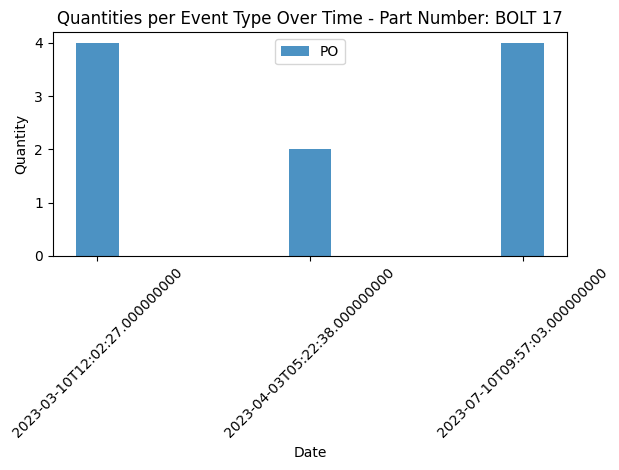

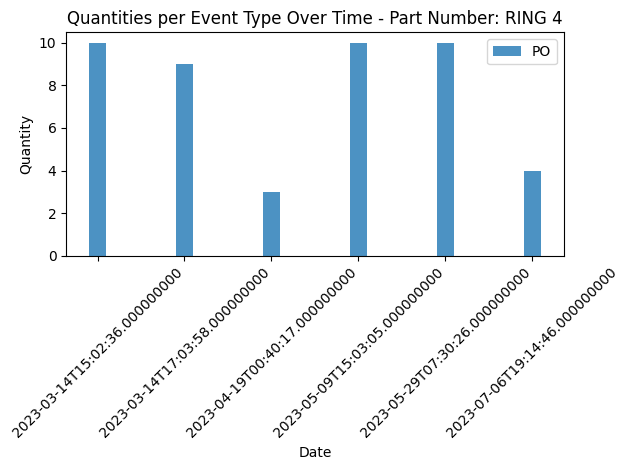

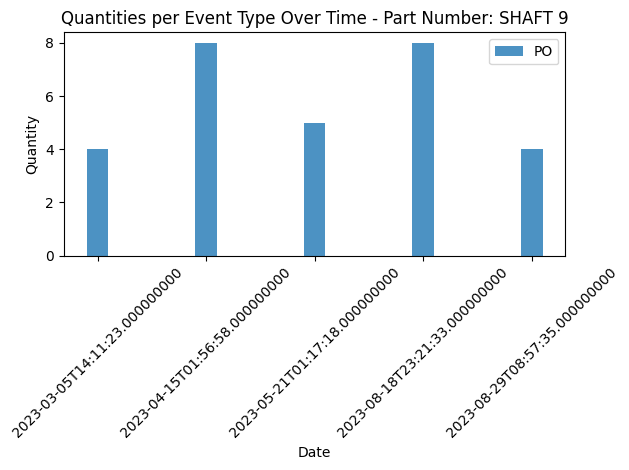

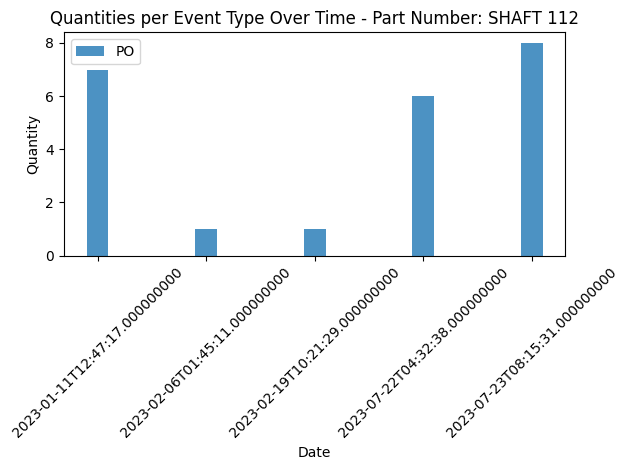

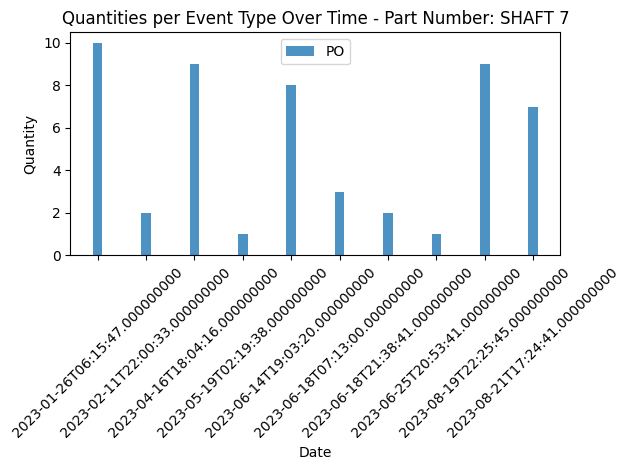

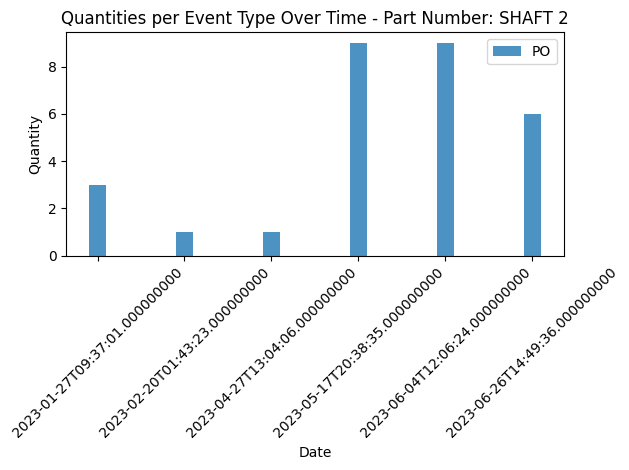

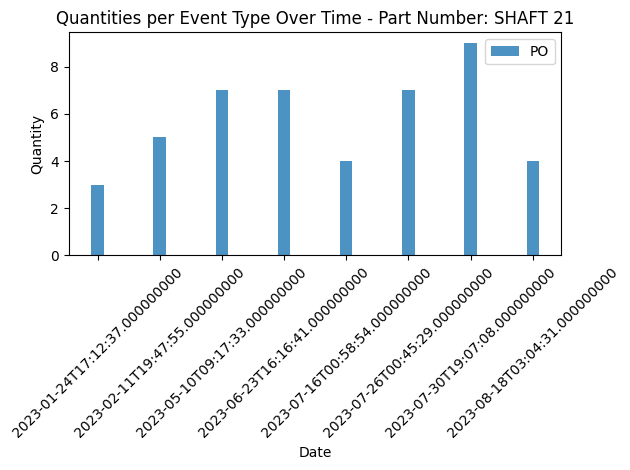

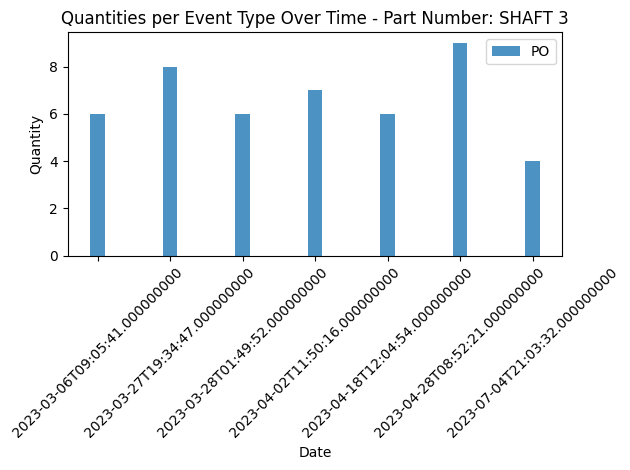

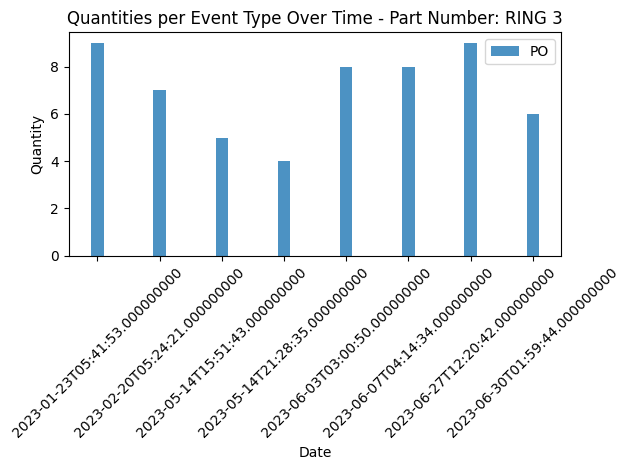

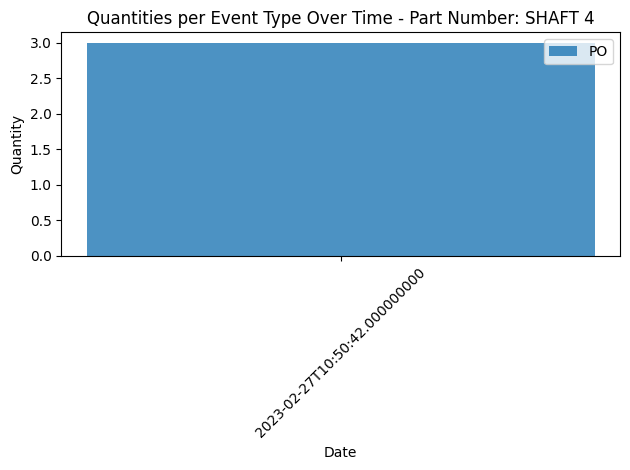

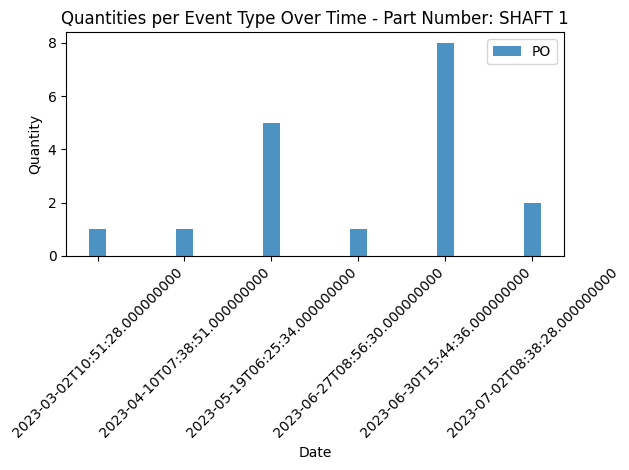

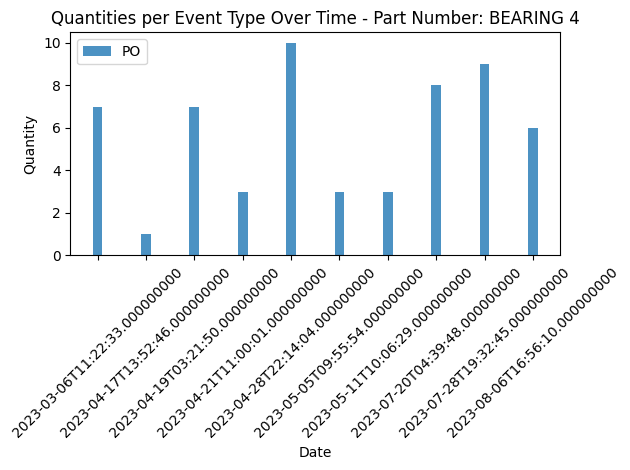

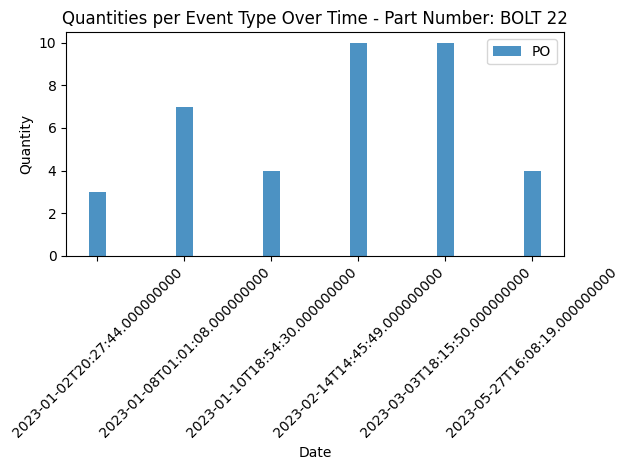

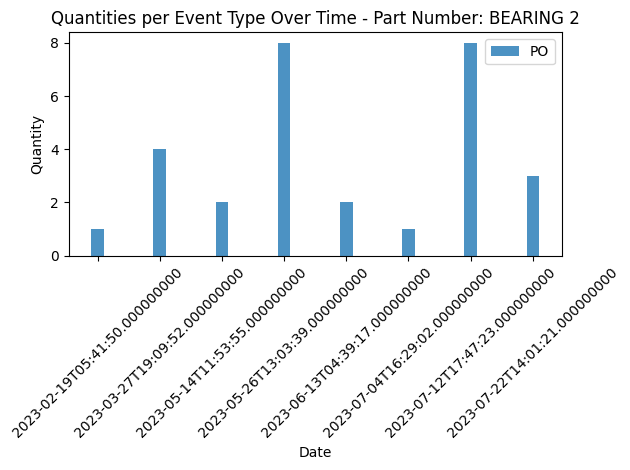

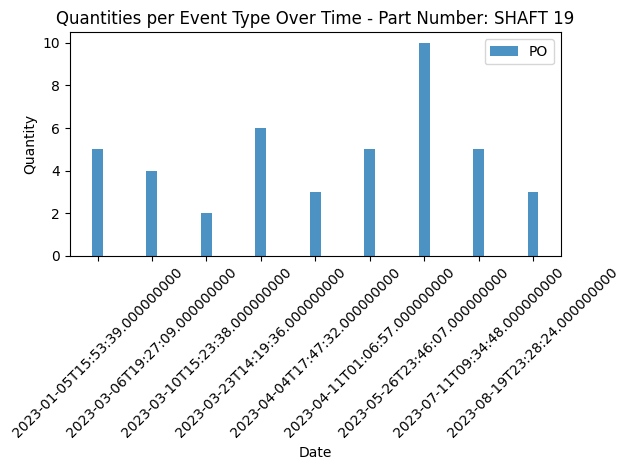

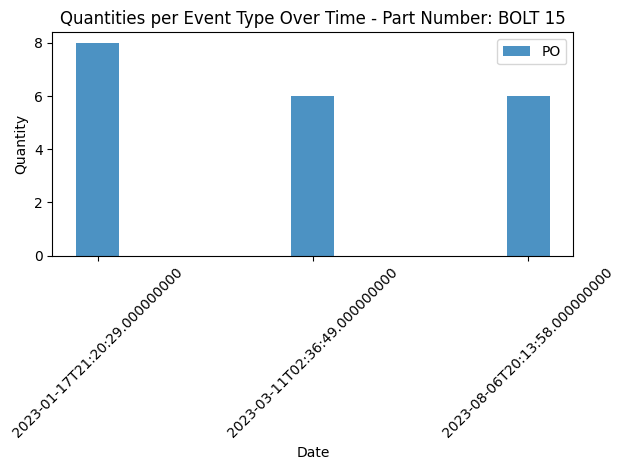

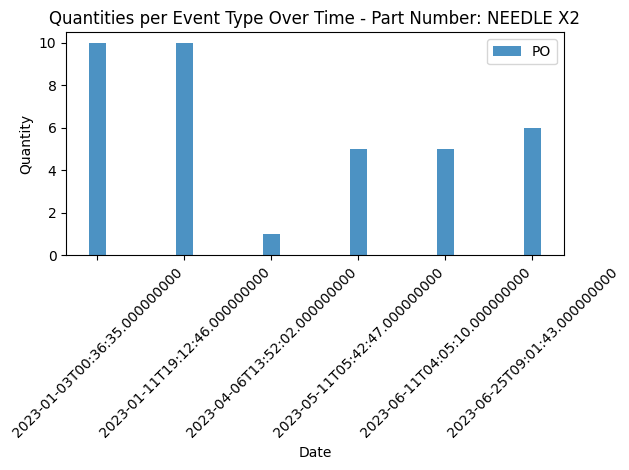

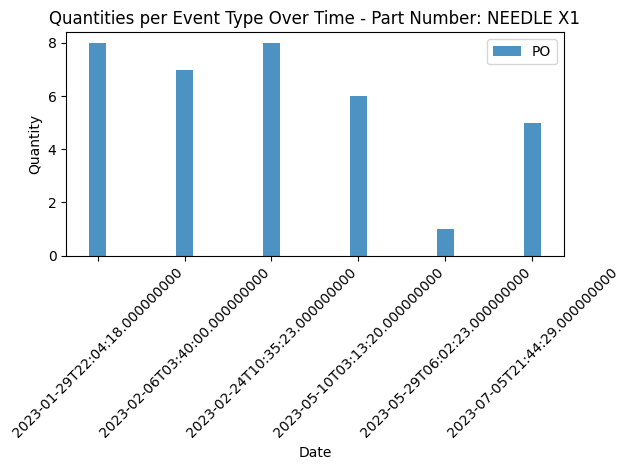

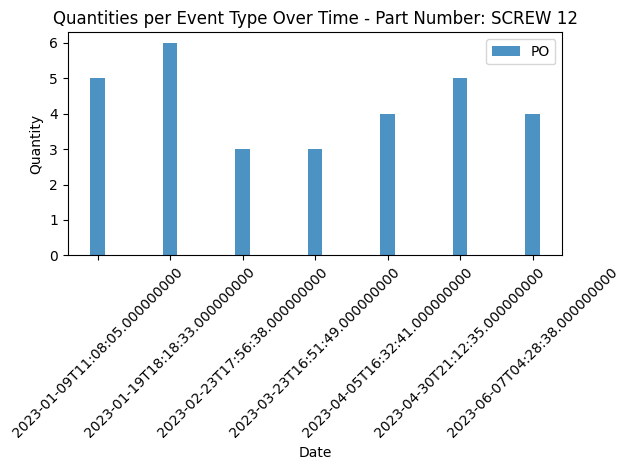

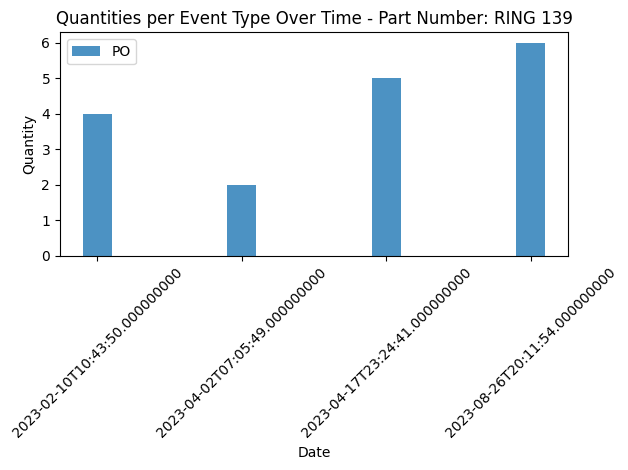

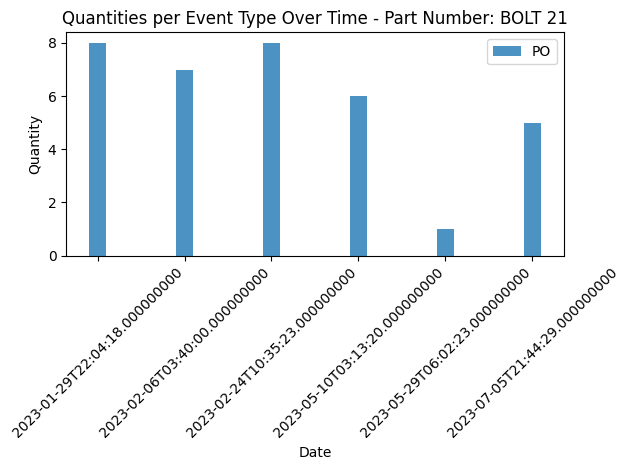

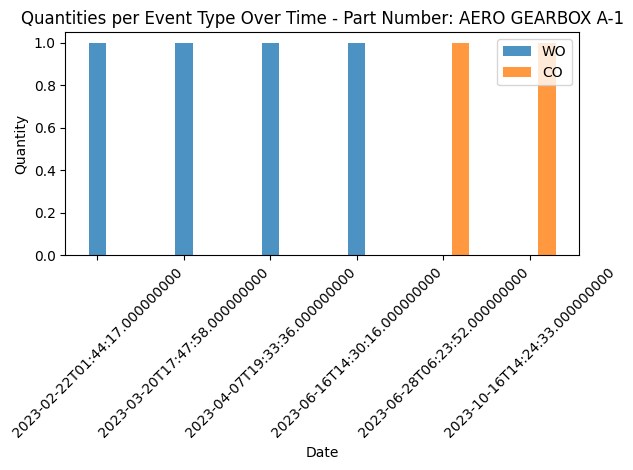

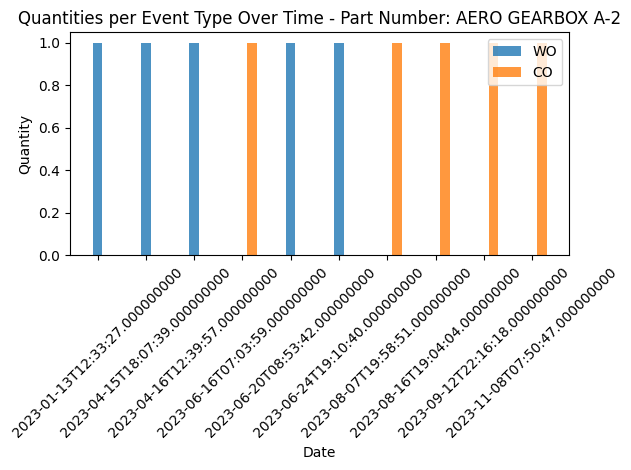

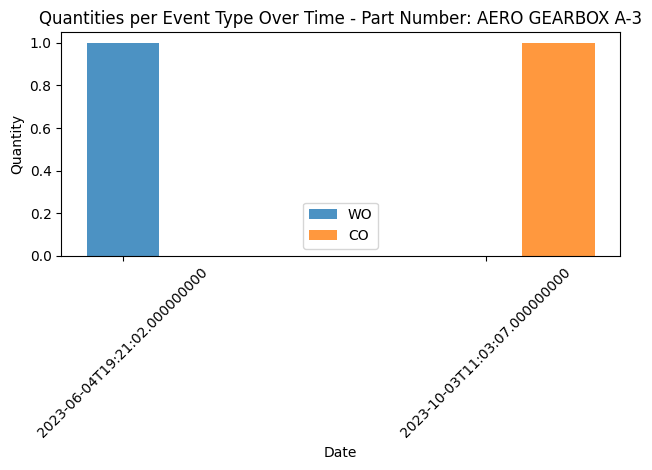

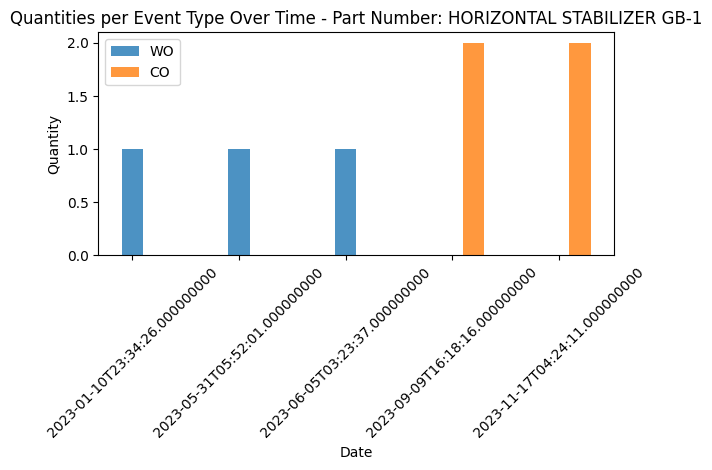

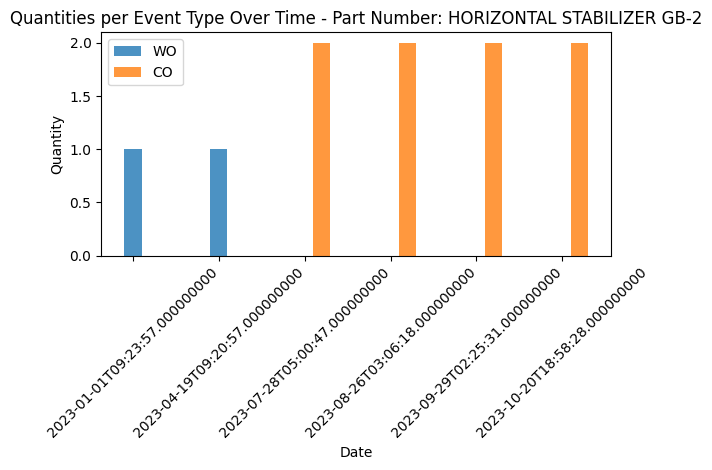

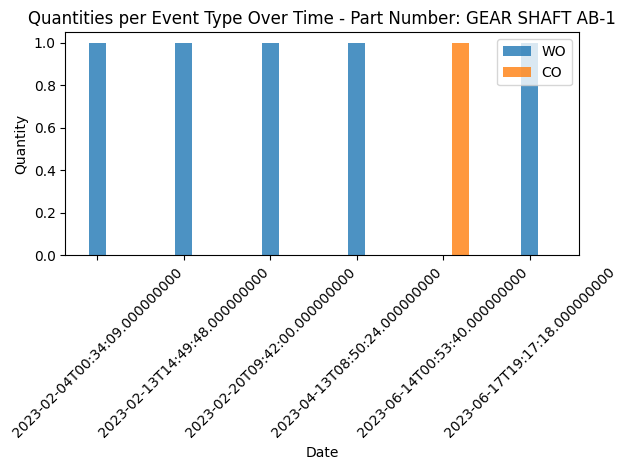

In [22]:
for part_name in parts.part_name.unique():
    plt = plot_all_part_events(all_parts_events, part_name)
    plt.show()

# Part II : Stock Projection

Pour cette partie, on a deux hypothèses :
- Un ordre de fabrication et un ordre de commande augmentent le stock d'une pièce.
- Une commande client diminue le stock d'une pièce.



### Q12 : Given the two hypothesis : compute the stock trajectory for each part ?

In [87]:
def plot_part_stock_trajectory(events_df, part_name, plot=None):
    part_events_df = events_df[events_df.part_name==part_name]

    # Convertir la colonne 'date' au type datetime
    part_events_df['date'] = pd.to_datetime(part_events_df['date'])

    # Trier les événements par date en ordre ascendant
    part_events_df = part_events_df.sort_values(by='date', ascending=True)

    # Rendre la quantité des customers orders négative
    part_events_df.loc[part_events_df['event_type'].isin(['CO']), 'quantity']  *= -1
    # Le stock sur le temps est une somme cumuléé des quantités des événements
    part_events_df['stock'] = part_events_df['quantity'].cumsum()

    stocks = part_events_df['stock'].values
    dates = part_events_df['date'].values

    if plot is None:
        plt.figure()
        plt.tight_layout()
        plt.xlabel('Date')
        plt.ylabel('Stock')
        plt.title(f'Stock Trajectory - Part Name: {part_name}')
        plt.xticks(np.arange(len(dates)), dates, rotation=45)

    plt.plot(stocks, marker='o', label=f'Part Name: {part_name}')
    return plt


/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


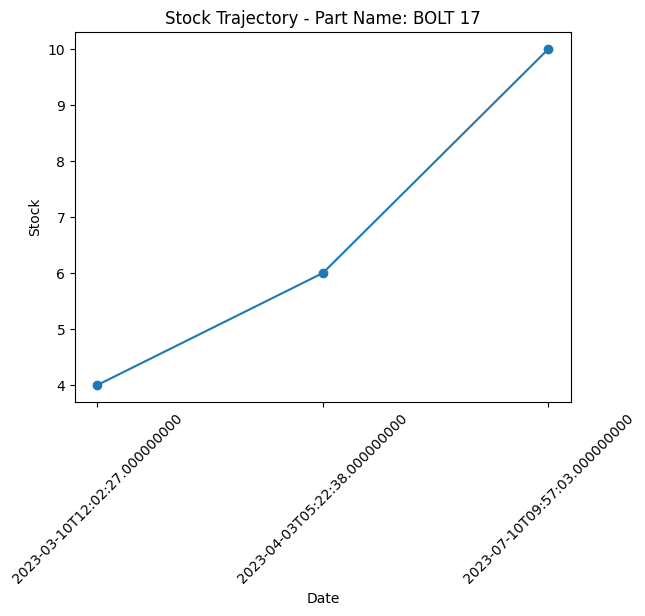

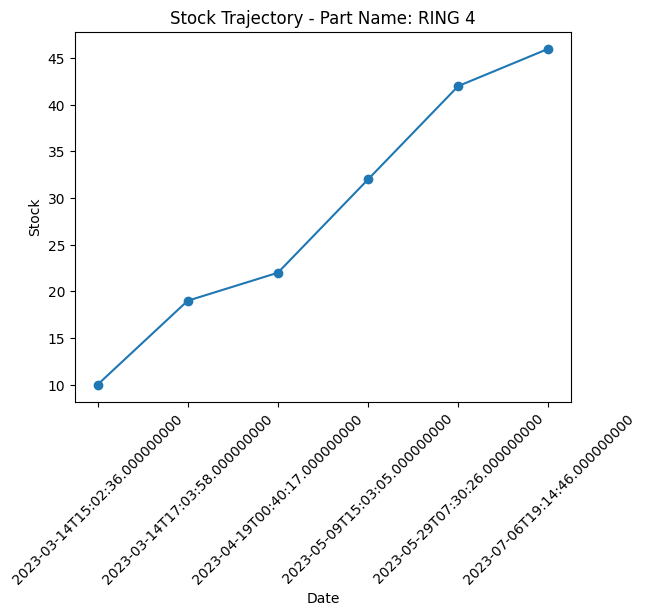

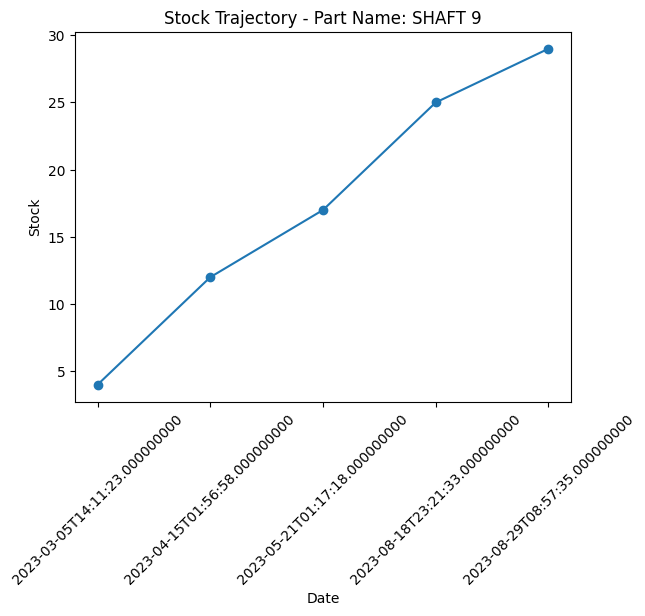

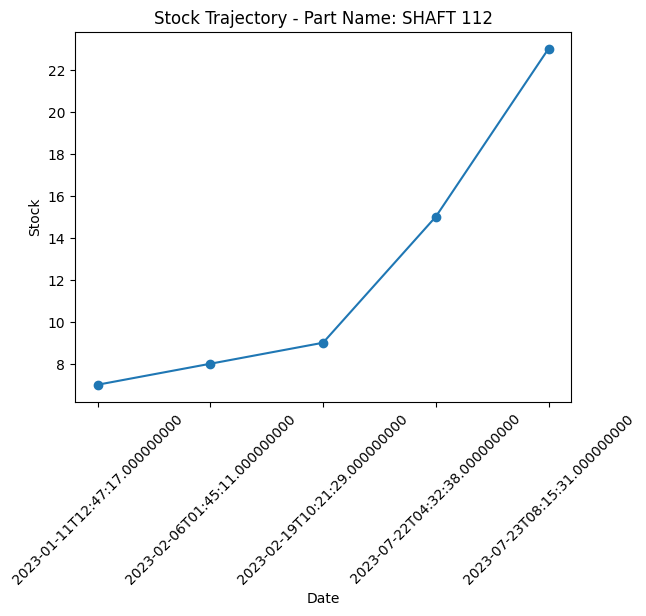

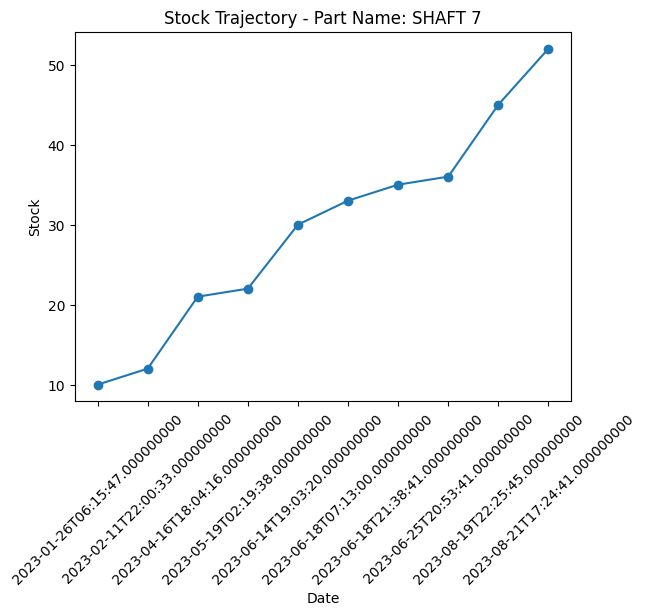

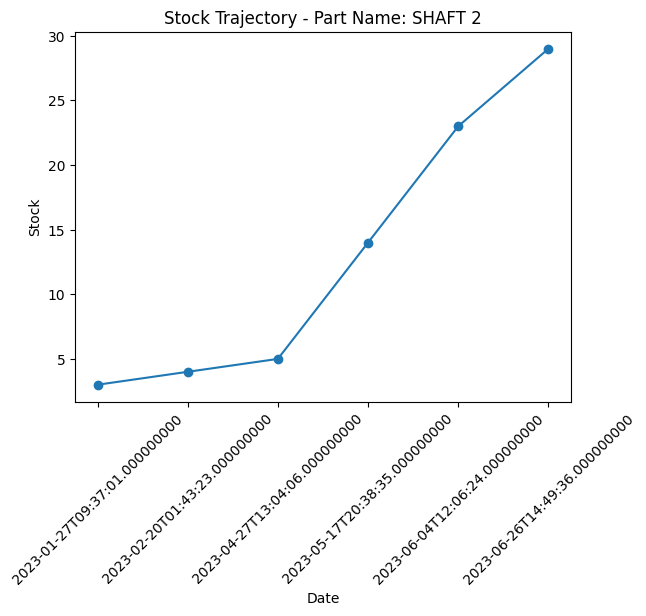

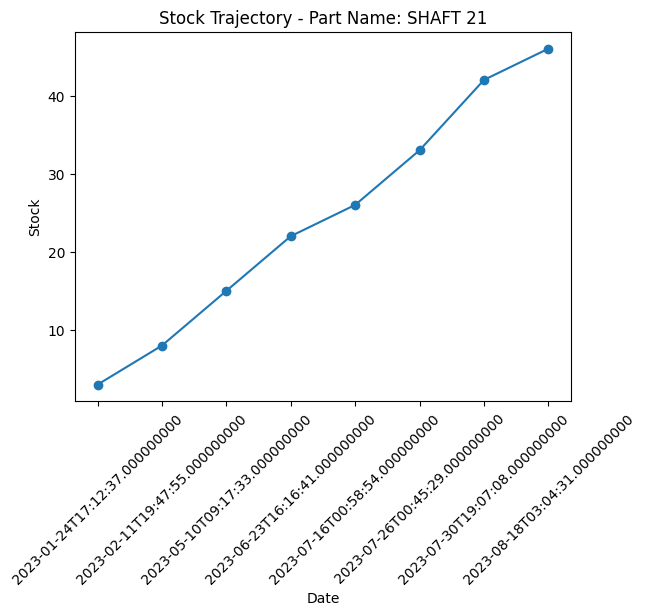

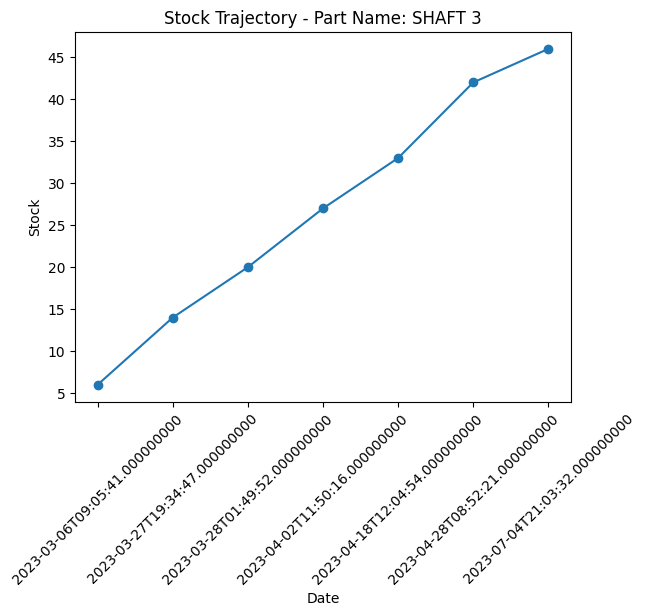

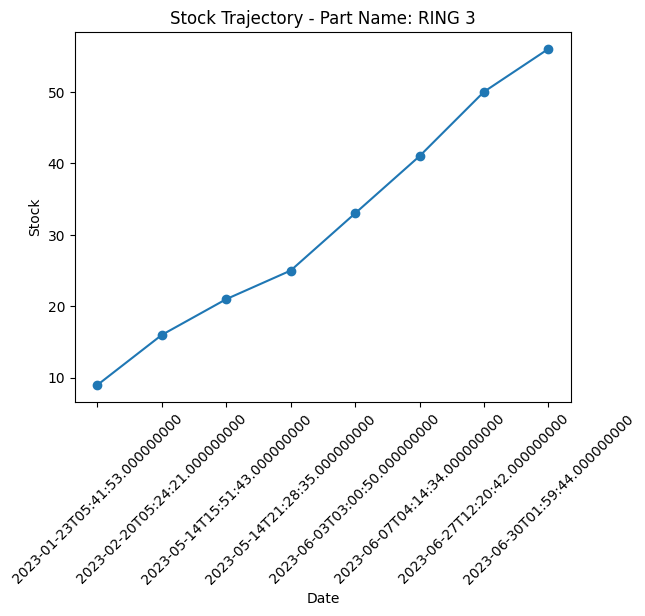

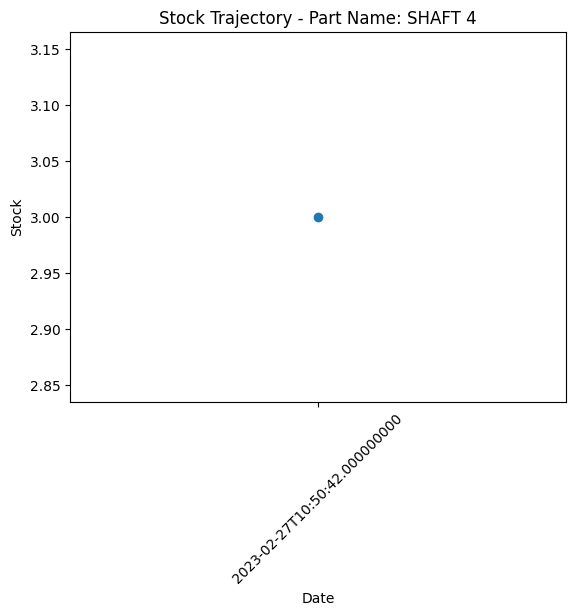

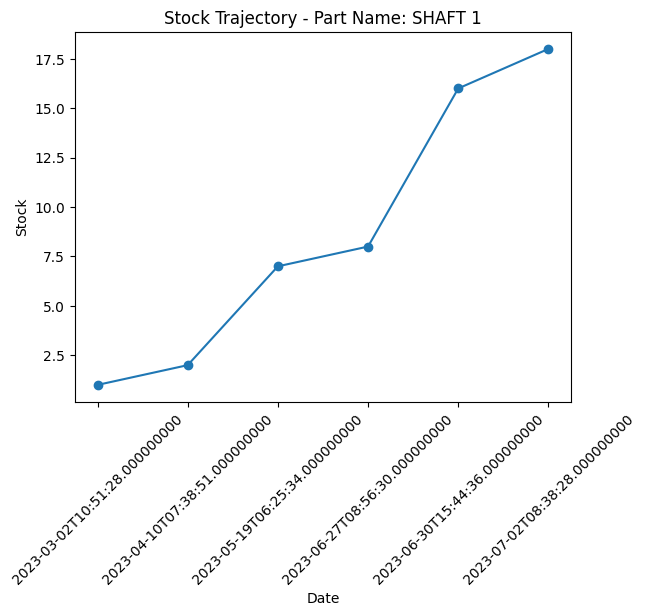

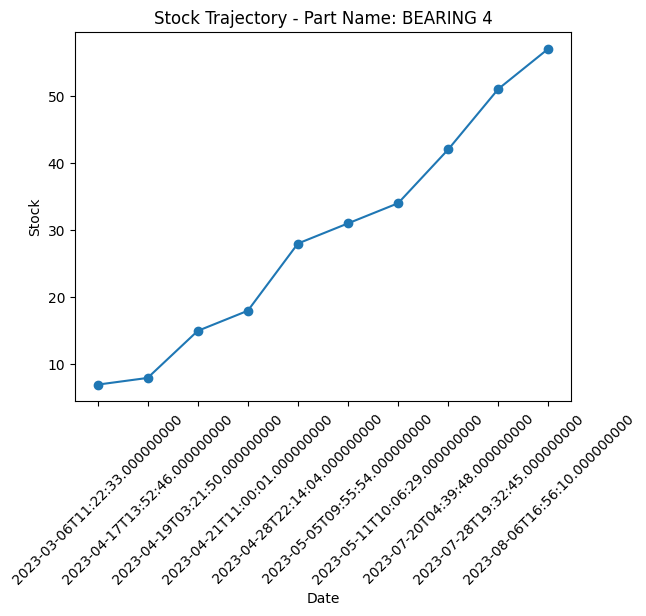

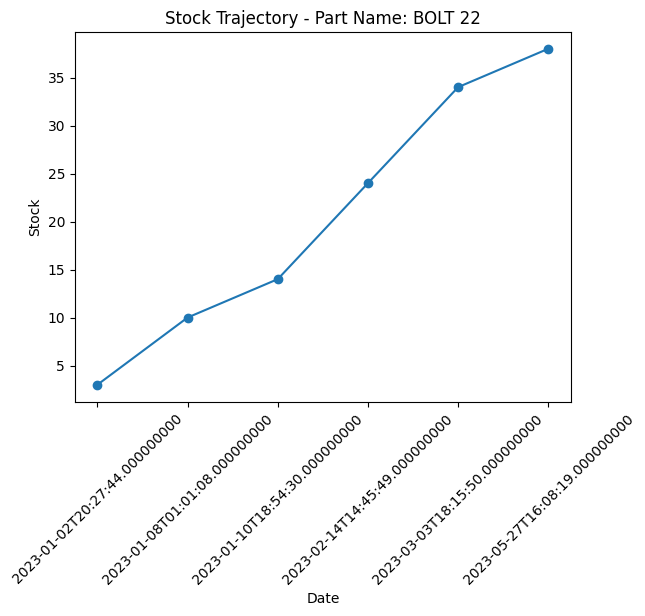

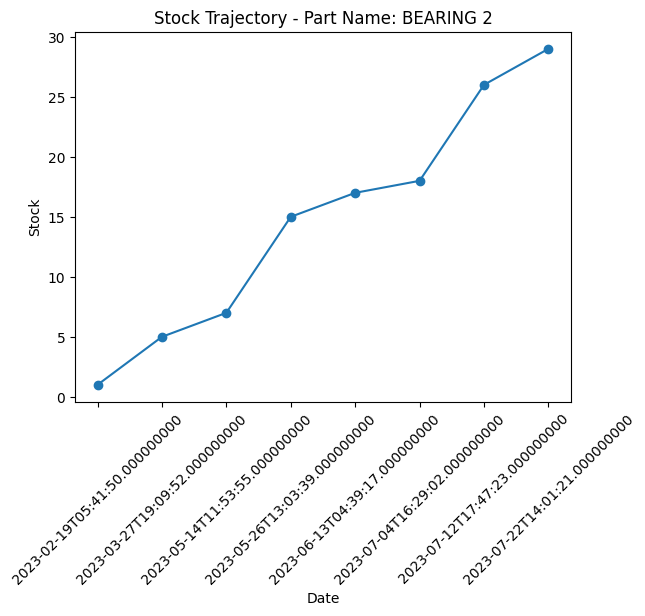

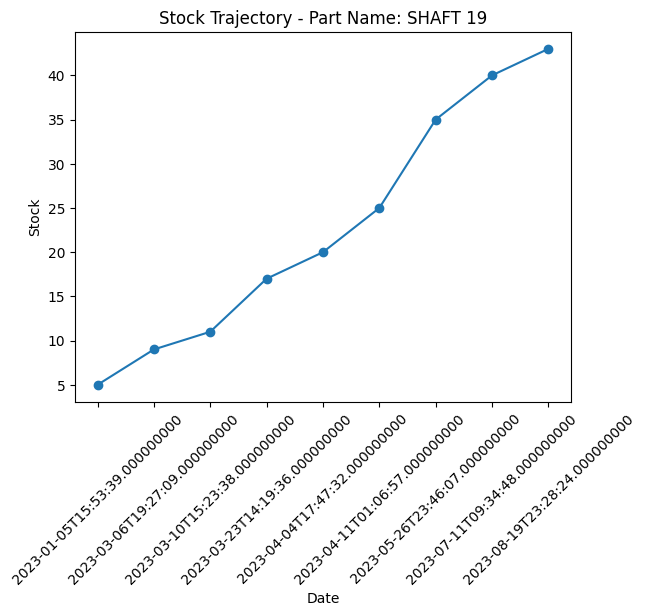

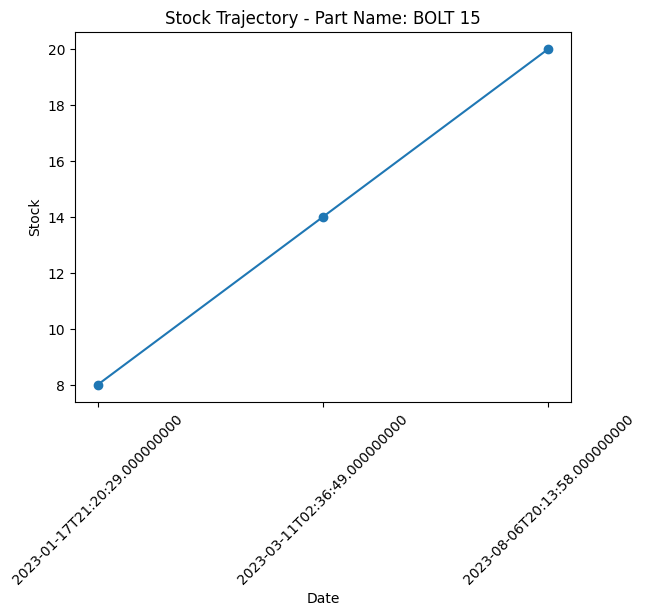

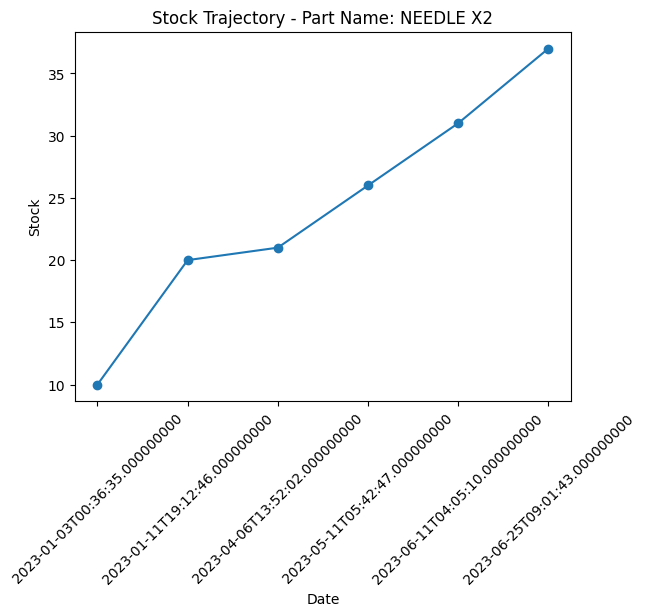

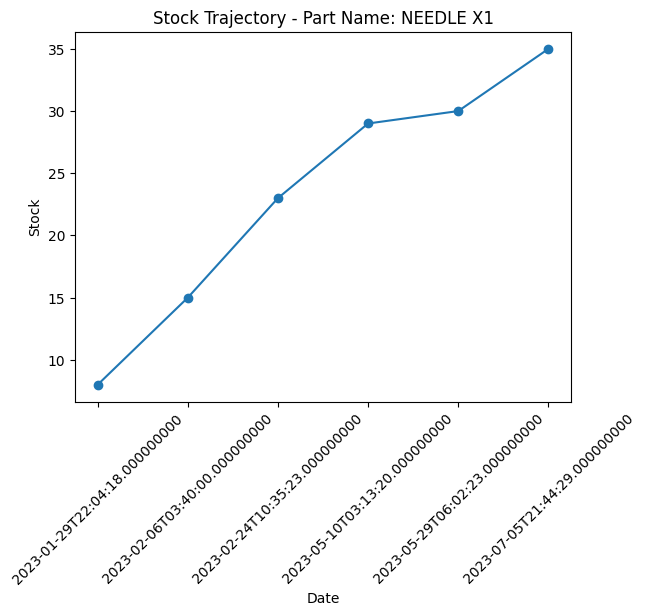

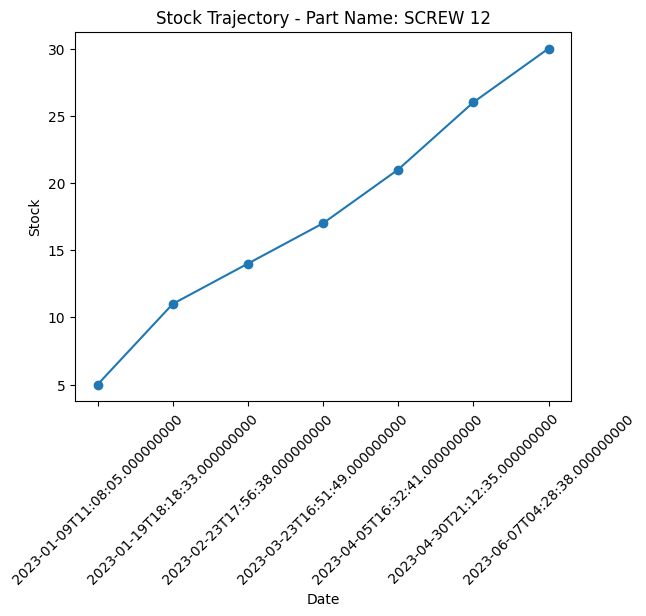

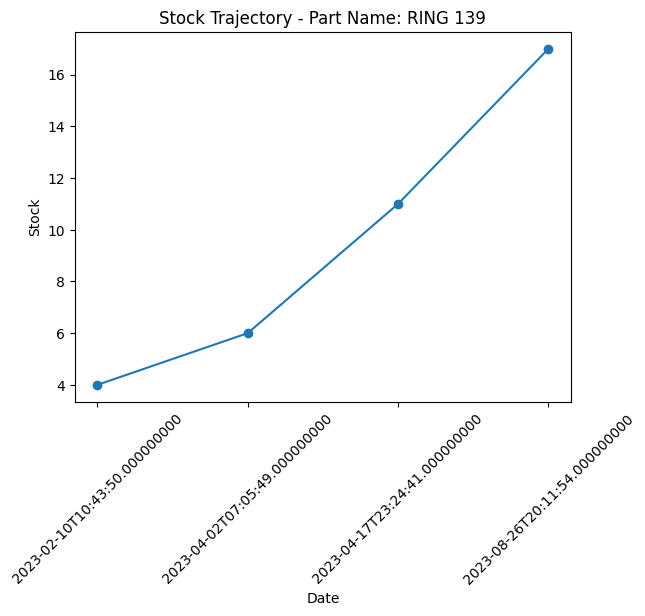

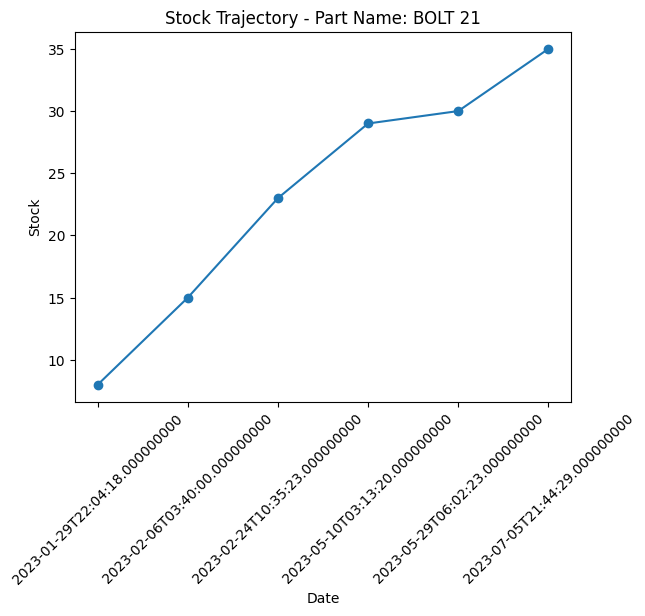

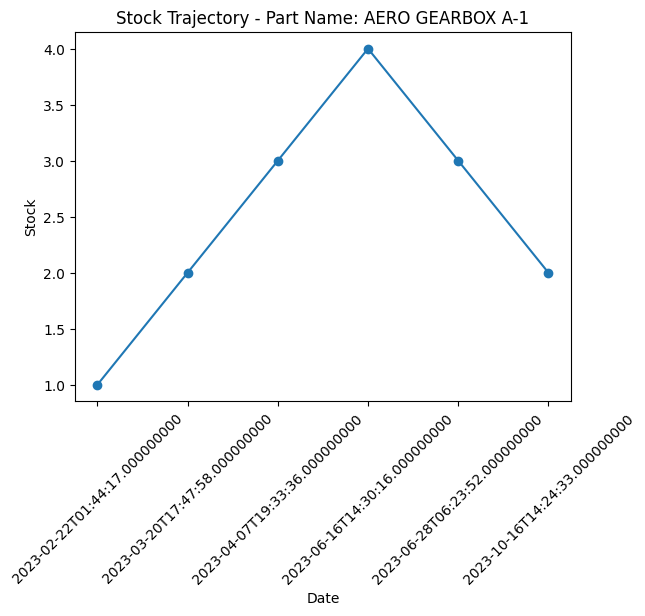

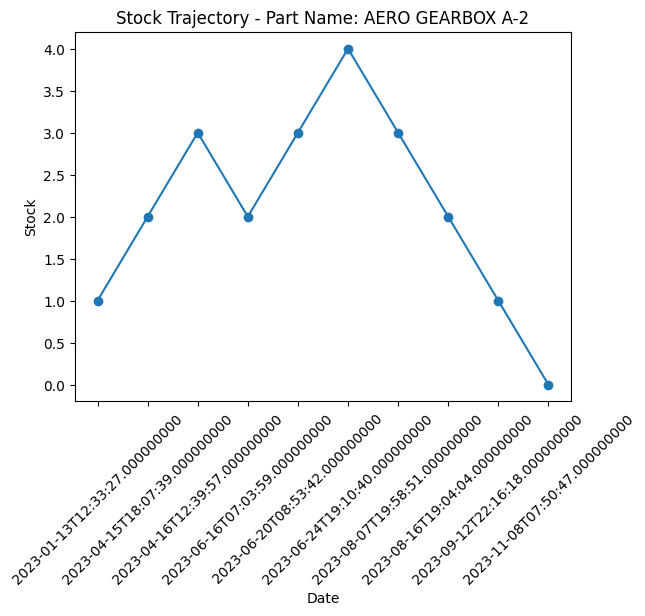

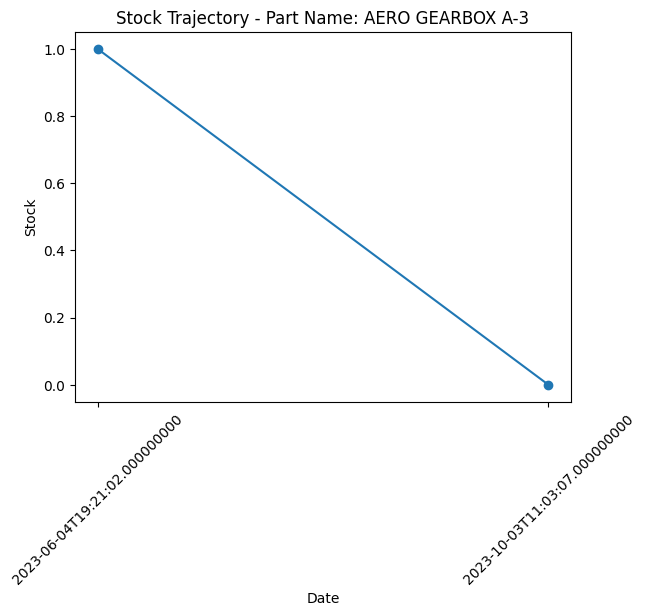

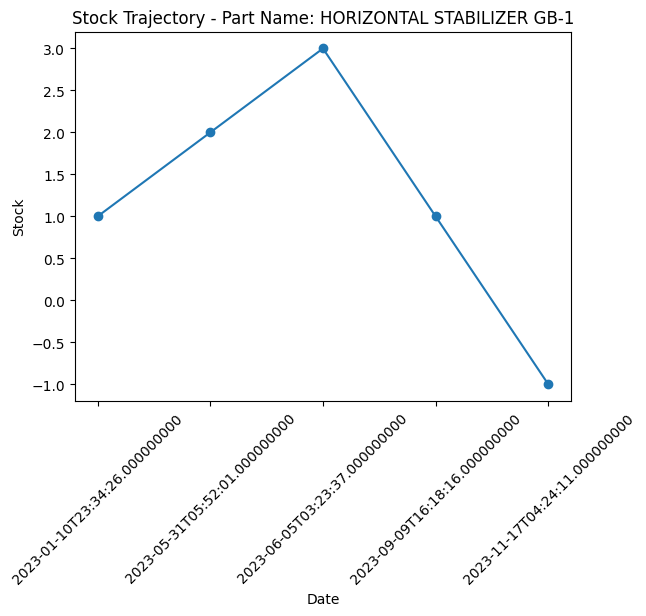

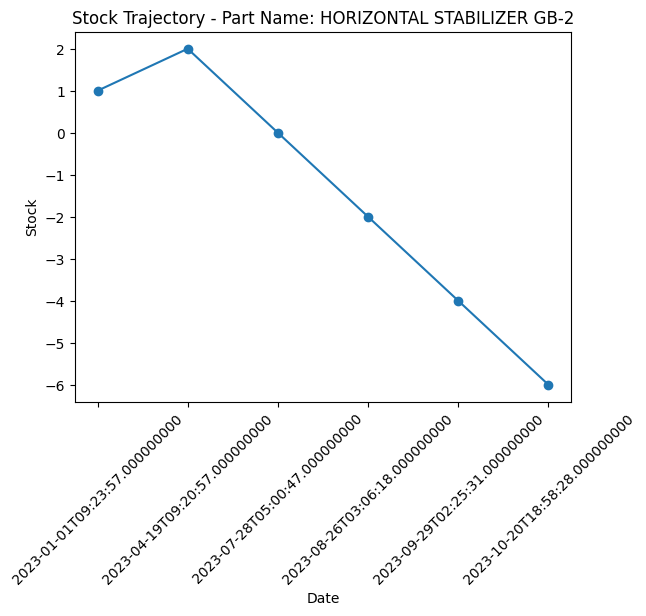

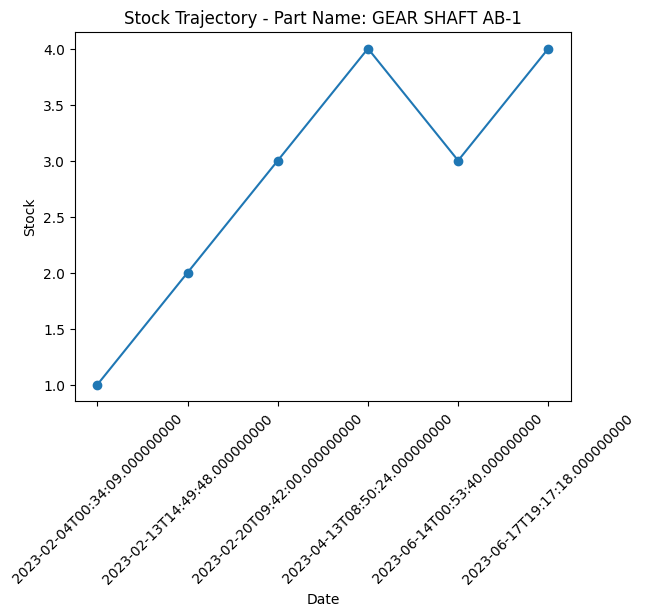

In [88]:
for part_name in parts.part_name.unique():
    plt = plot_part_stock_trajectory(all_parts_events, part_name)
    plt.show()

/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


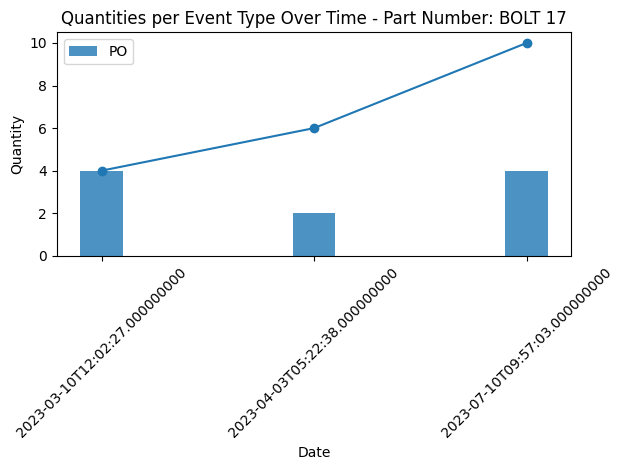

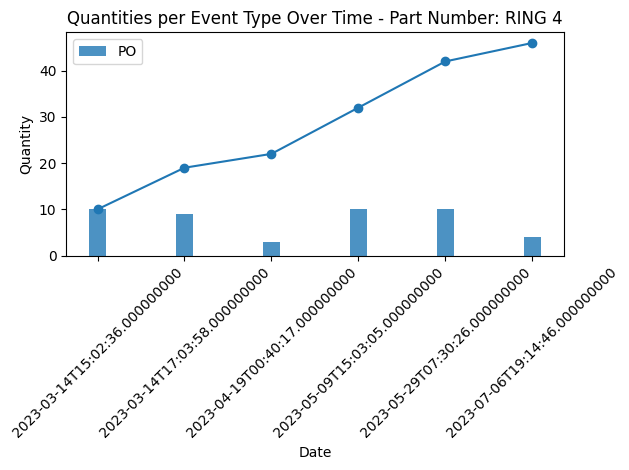

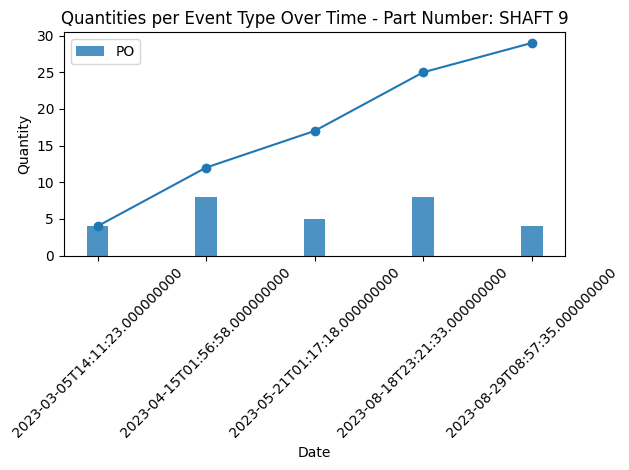

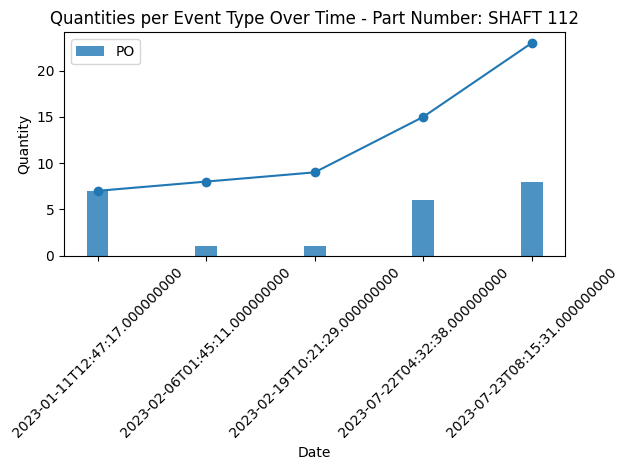

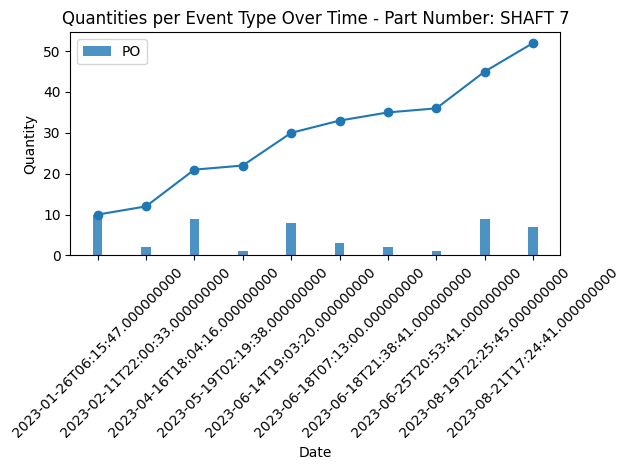

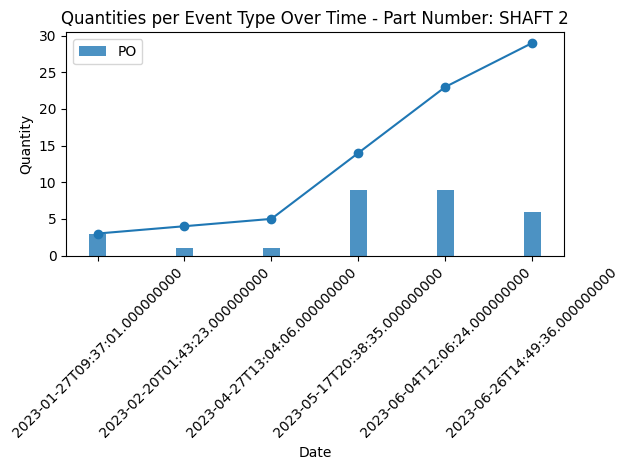

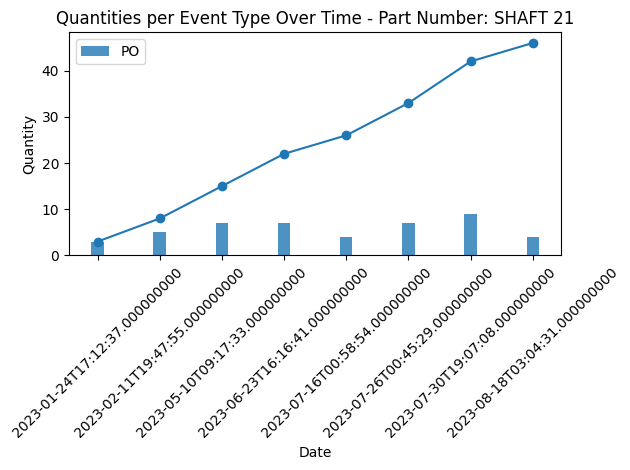

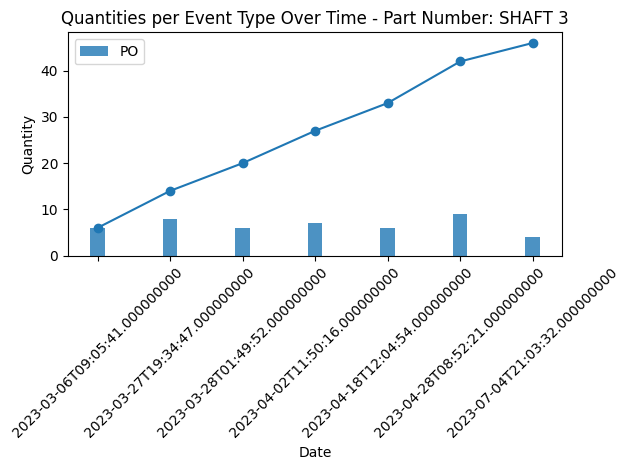

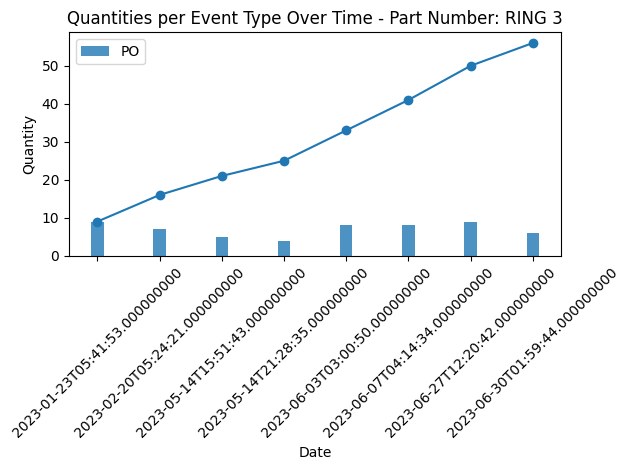

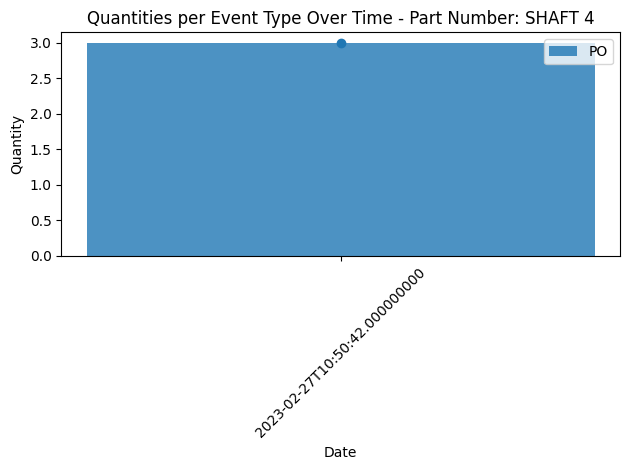

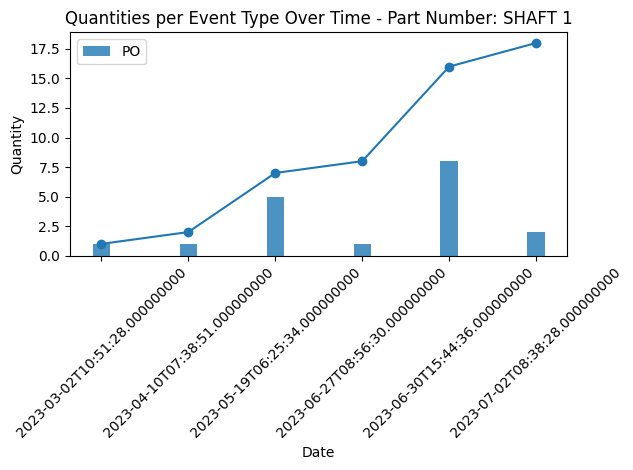

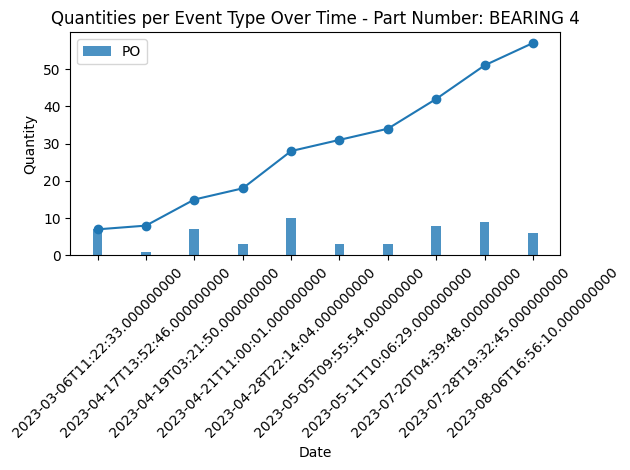

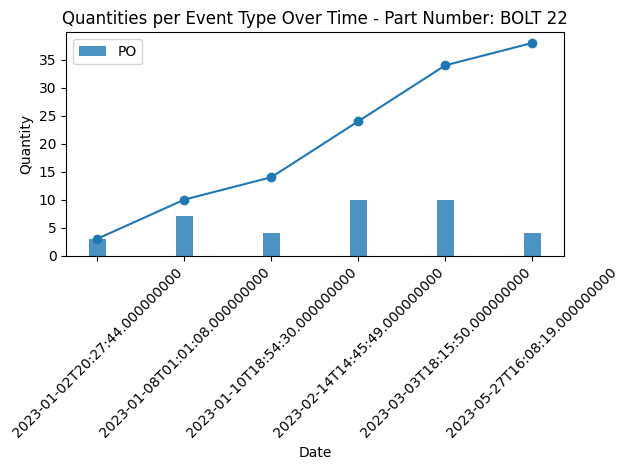

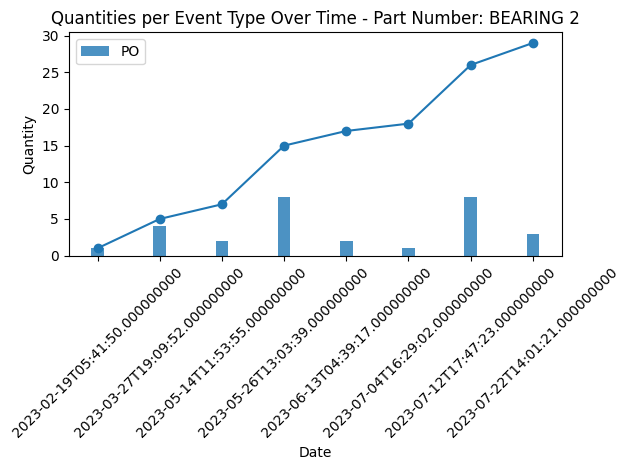

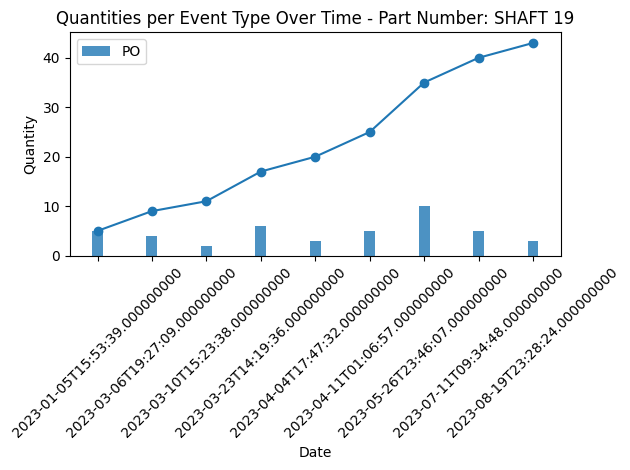

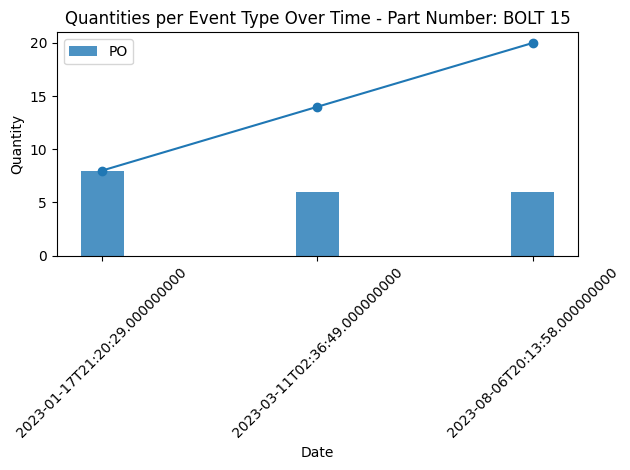

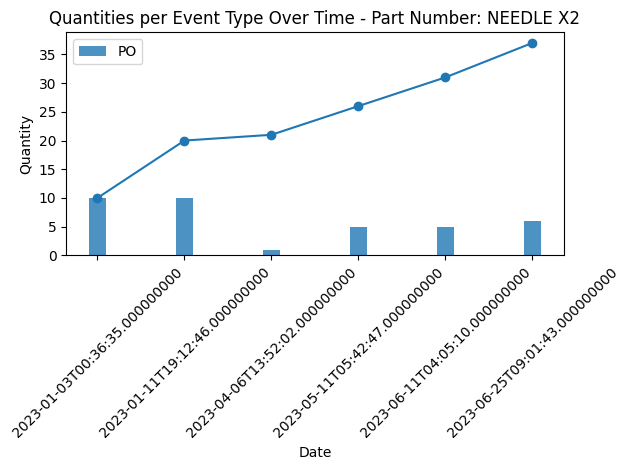

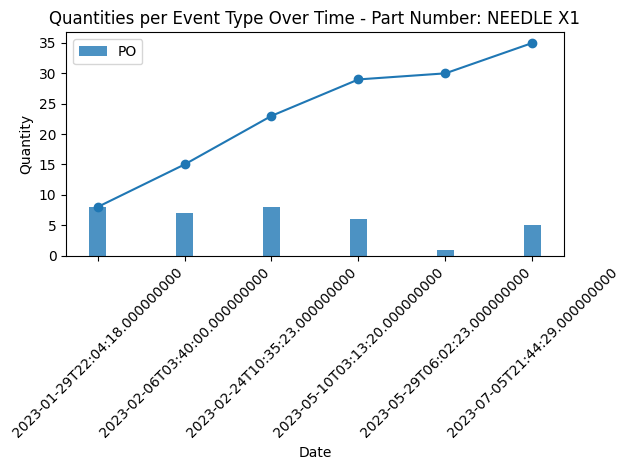

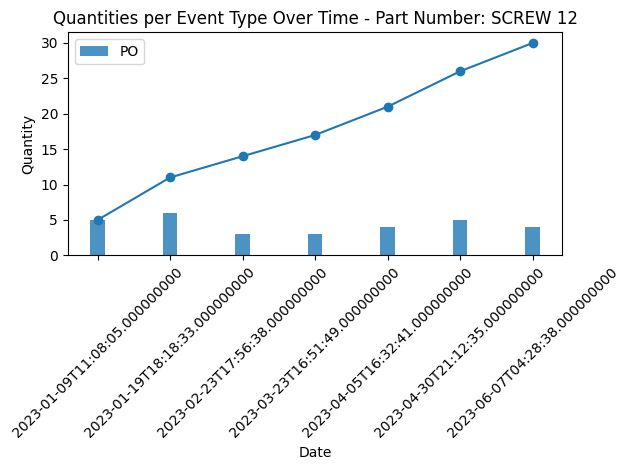

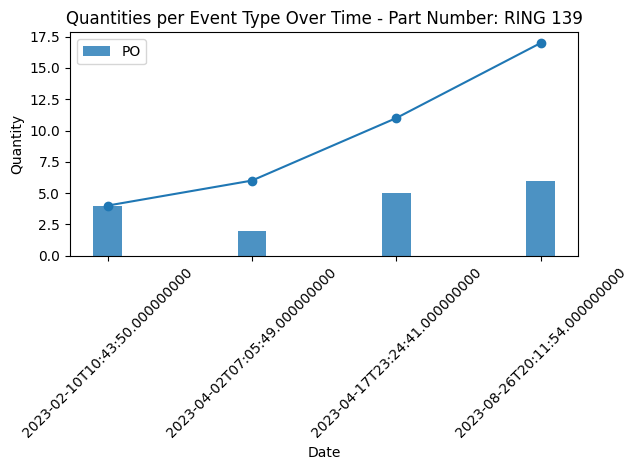

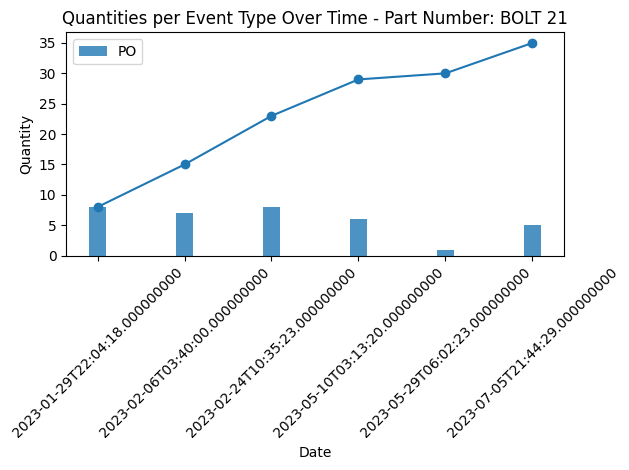

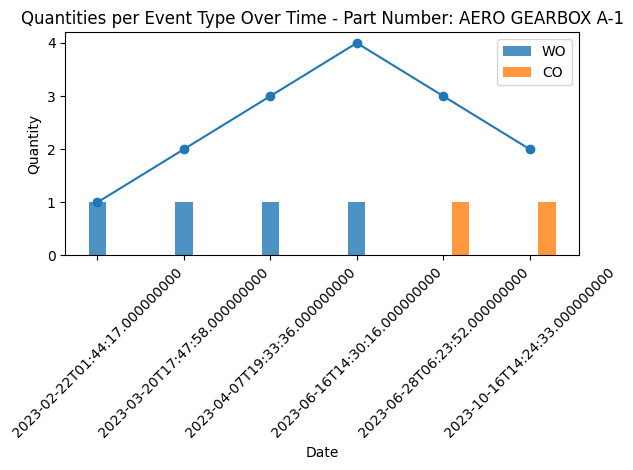

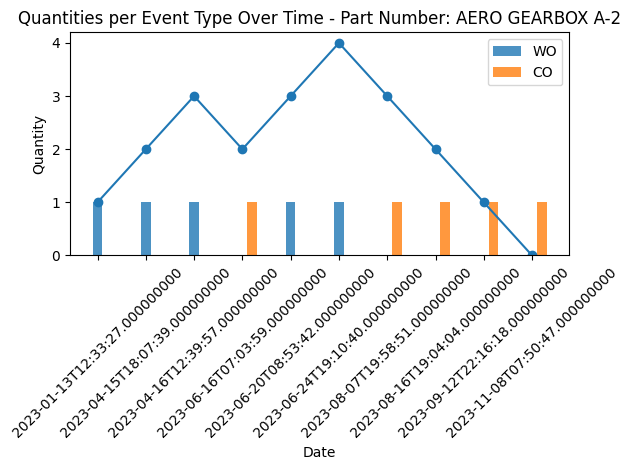

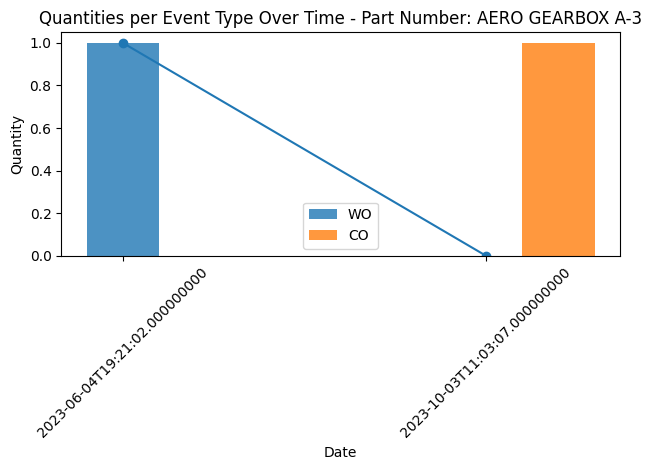

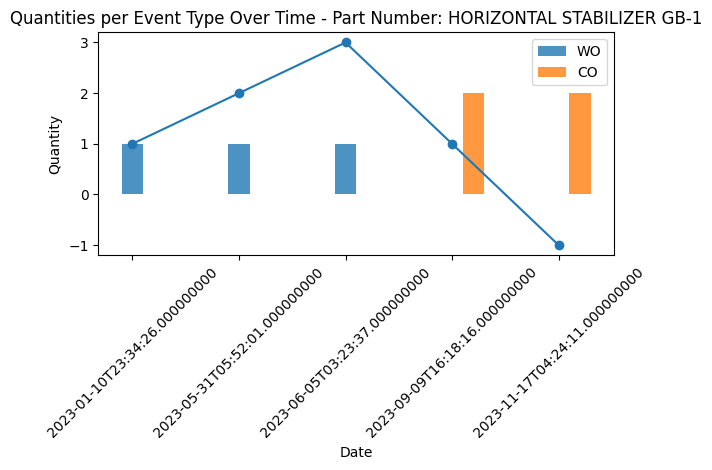

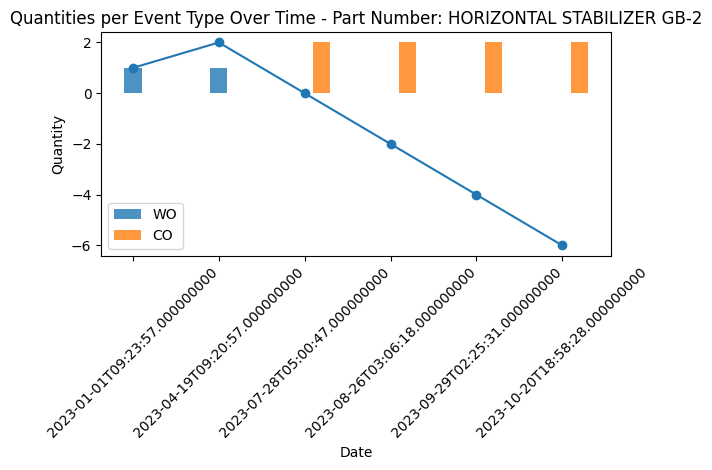

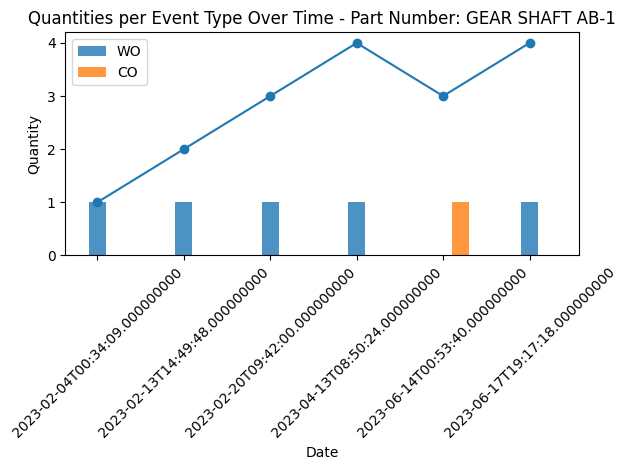

In [89]:
# Show part trajectory at the same chart as the events chart

for part_name in parts.part_name.unique():
    plt = plot_all_part_events(all_parts_events, part_name)
    plt = plot_part_stock_trajectory(all_parts_events, part_name, plt)
    plt.show()

### Q13 : Given an initial stock for some parts, what is the new stock trajectory for each part ?

In [98]:
def plot_part_stock_trajectory_with_initial_stock(events_df, part_name, plot=None):
    part_events_df = events_df[events_df.part_name==part_name]

    # Convertir la colonne 'date' au type datetime
    part_events_df['date'] = pd.to_datetime(part_events_df['date'])

    # Trier les événements par date en ordre ascendant
    part_events_df = part_events_df.sort_values(by='date', ascending=True)

    # Rendre la quantité des customers orders négative
    part_events_df.loc[part_events_df['event_type'].isin(['CO']), 'quantity']  *= -1
    # Le stock sur le temps est une somme cumuléé des quantités des événements
    part_events_df['stock'] = part_events_df['quantity'].cumsum()

    # Stock initial de la part
    part_number = part_events_df.part_number.values[0]
    initial_part_stock = 0
    if part_number in initial_stock.part_number.values:
        initial_part_stock = initial_stock[initial_stock.part_number==part_number].quantity.values[0]

    print('Initial part stock : ', initial_part_stock)
    stocks = [s+initial_part_stock for s in part_events_df['stock'].values]
    dates = part_events_df['date'].values

    if plot is None:
        plt.figure()
        plt.tight_layout()
        plt.xlabel('Date')
        plt.ylabel('Stock')
        plt.title(f'Stock Trajectory - Part Name: {part_name}')
        plt.xticks(np.arange(len(dates)), dates, rotation=45)

    plt.plot(stocks, marker='o', label=f'Part Name: {part_name}')
    return plt

Initial part stock :  6


/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


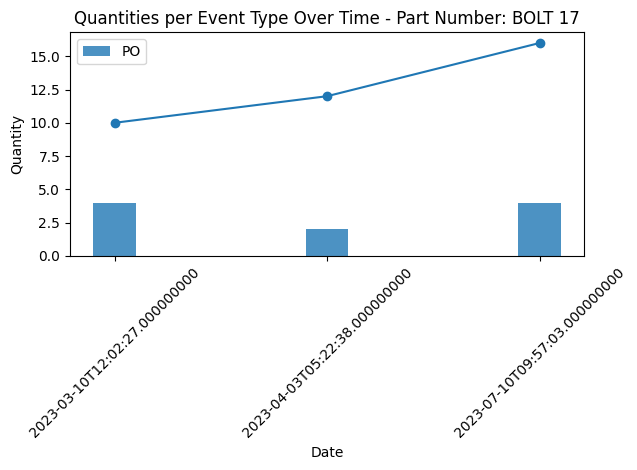

Initial part stock :  3


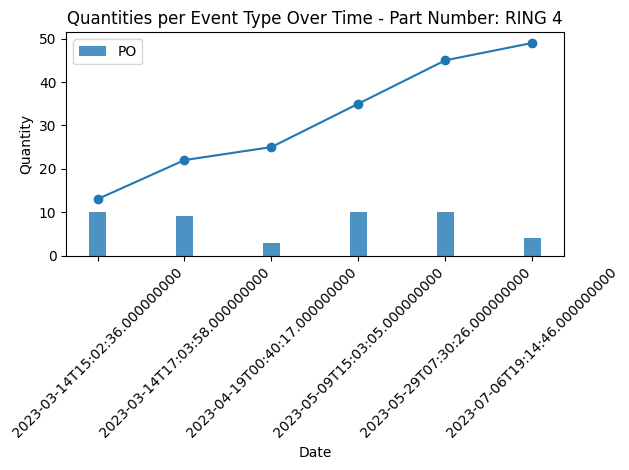

Initial part stock :  3


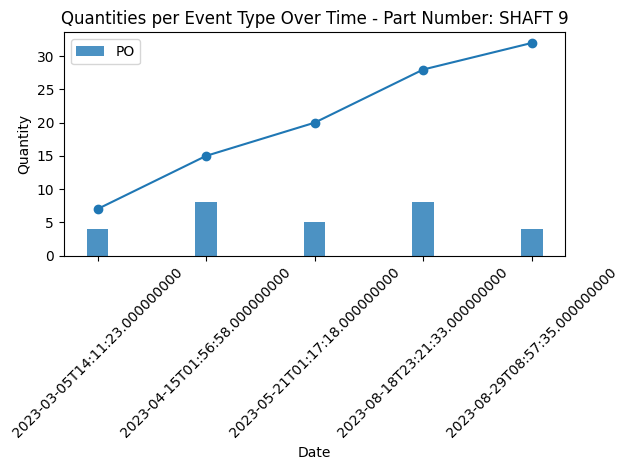

Initial part stock :  1


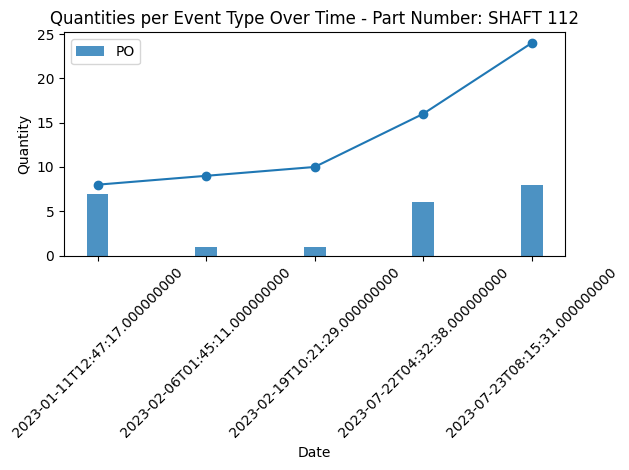

Initial part stock :  4


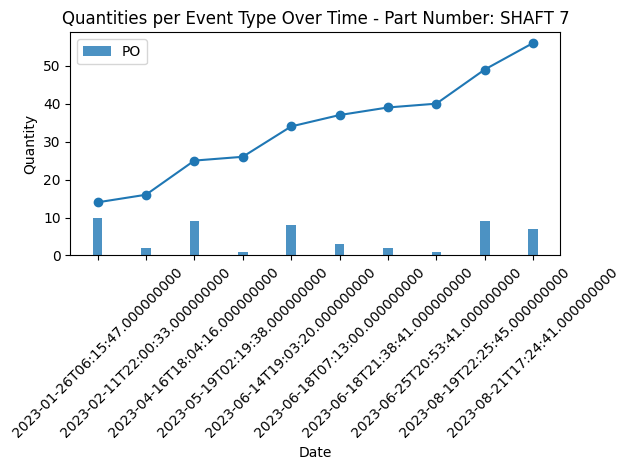

Initial part stock :  6


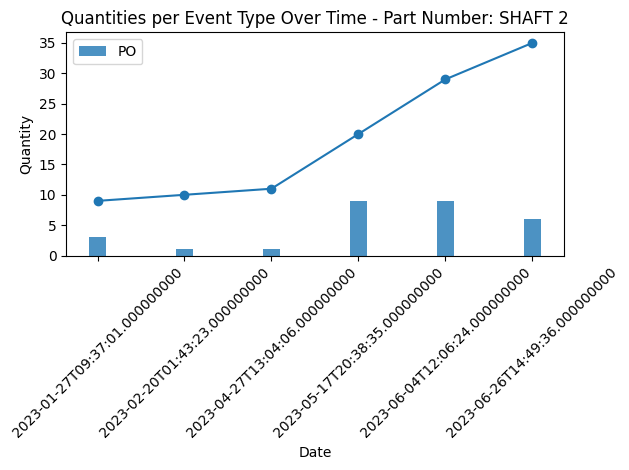

Initial part stock :  2


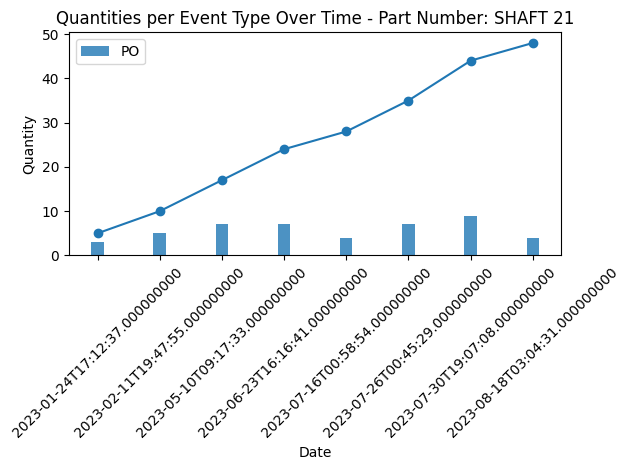

Initial part stock :  2


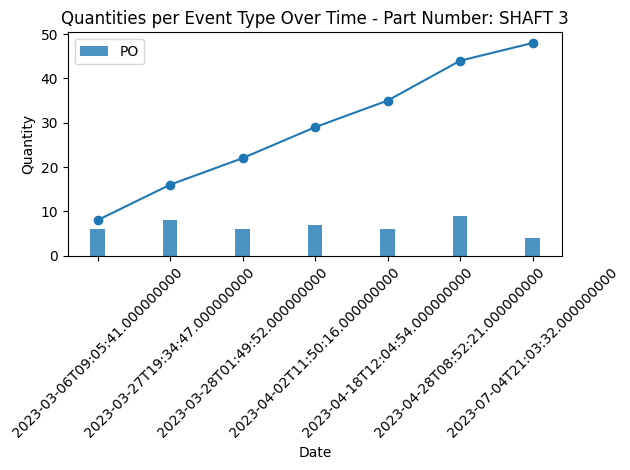

Initial part stock :  6


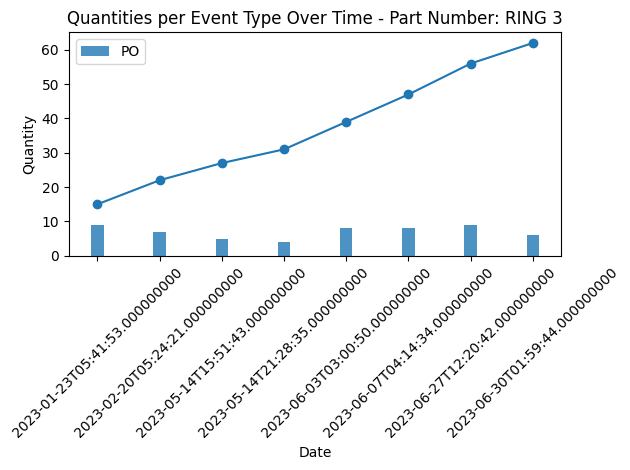

Initial part stock :  4


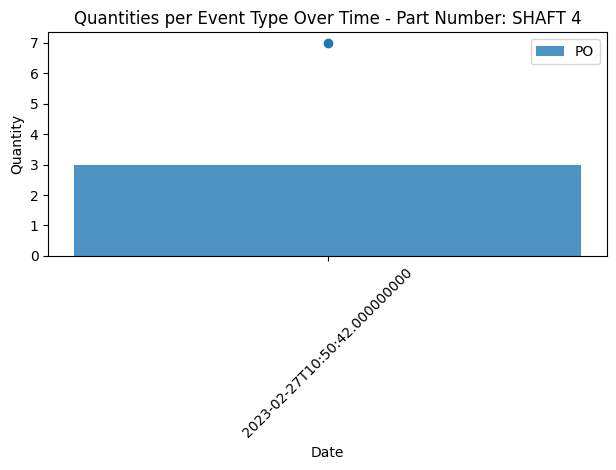

Initial part stock :  1


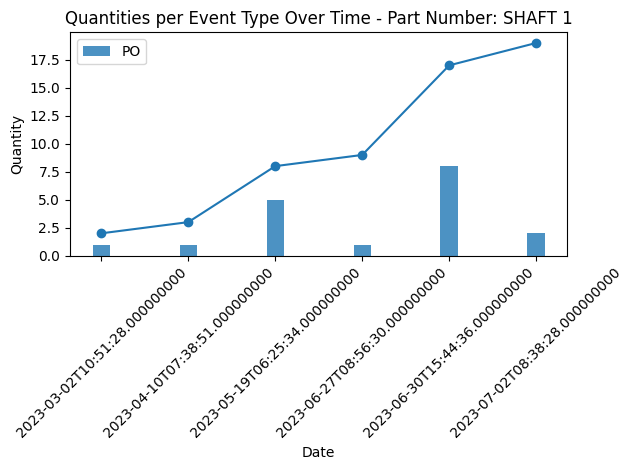

Initial part stock :  2


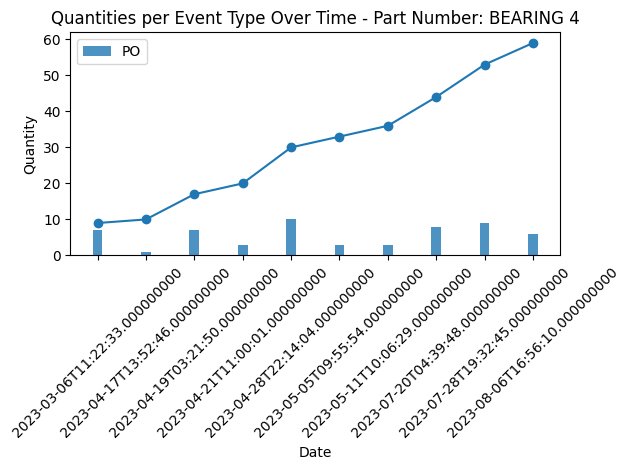

Initial part stock :  4


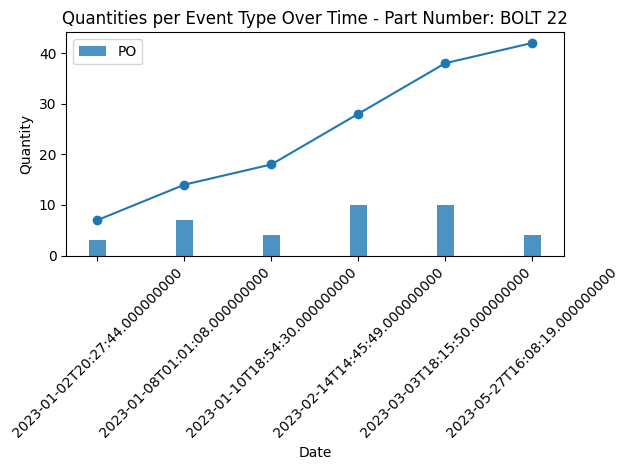

Initial part stock :  5


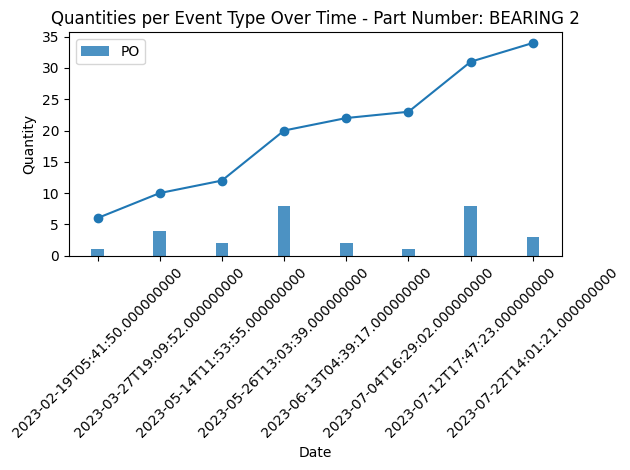

Initial part stock :  3


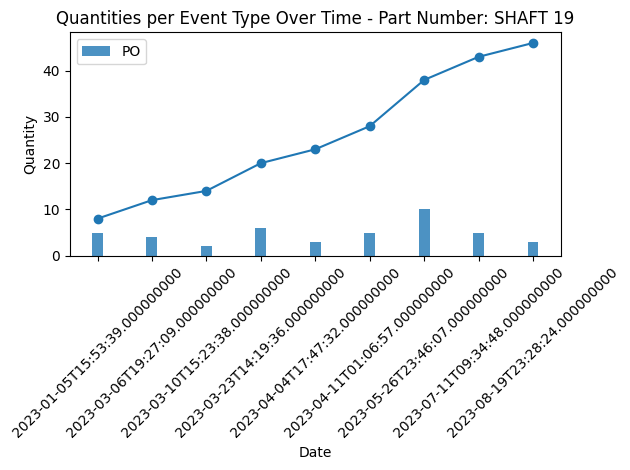

Initial part stock :  2


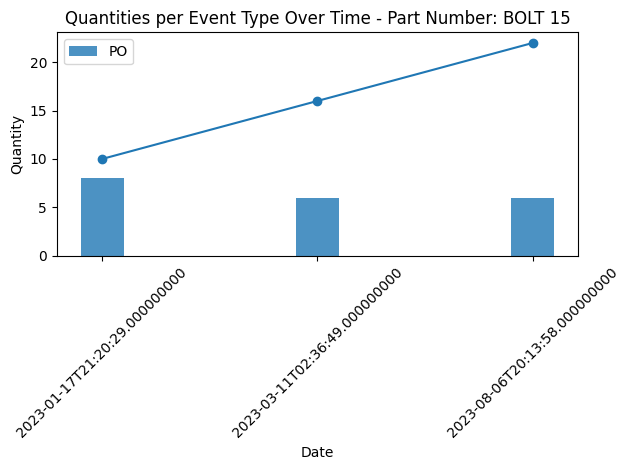

Initial part stock :  3


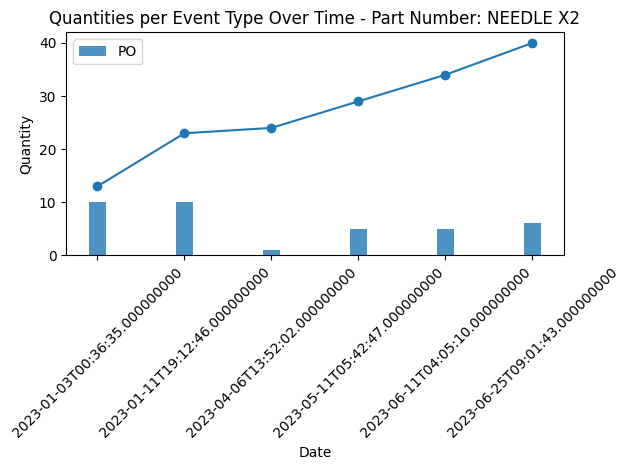

Initial part stock :  3


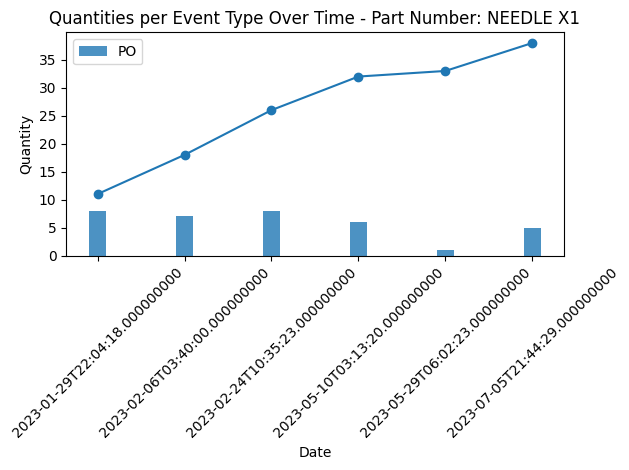

Initial part stock :  4


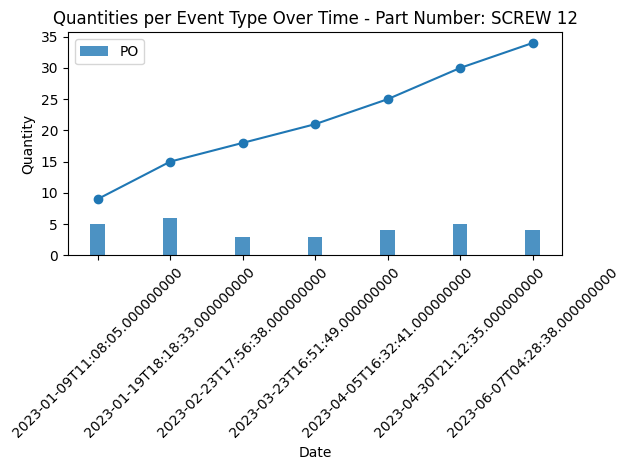

Initial part stock :  3


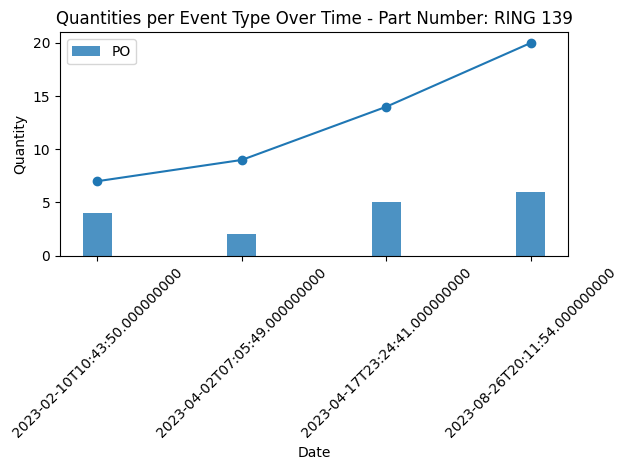

Initial part stock :  3


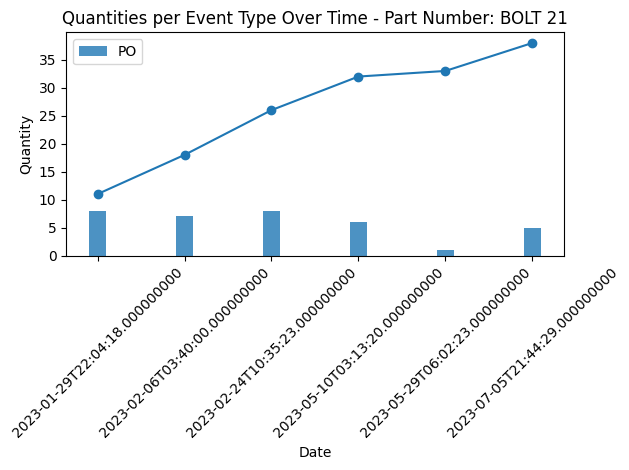

Initial part stock :  0


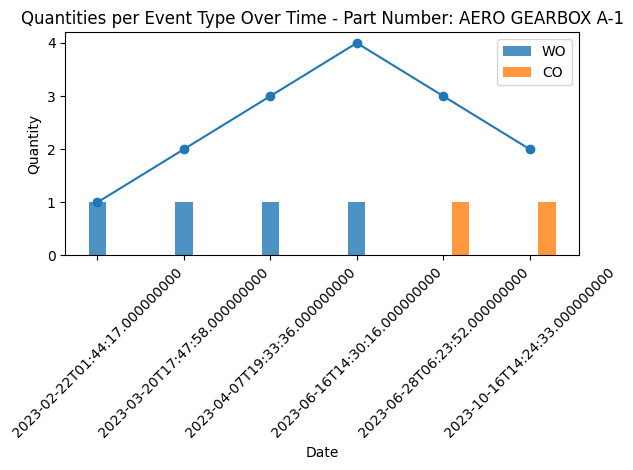

Initial part stock :  0


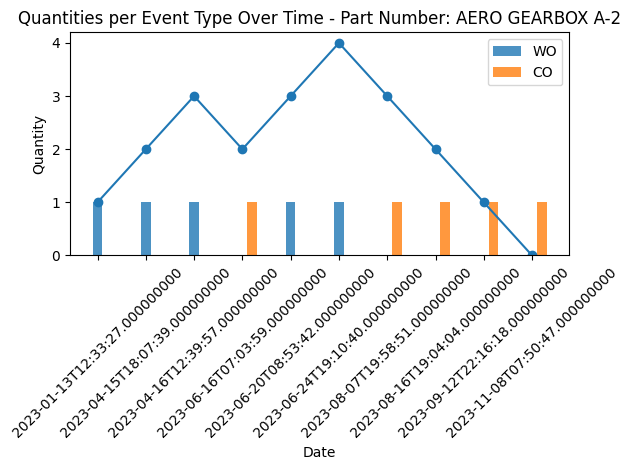

Initial part stock :  0


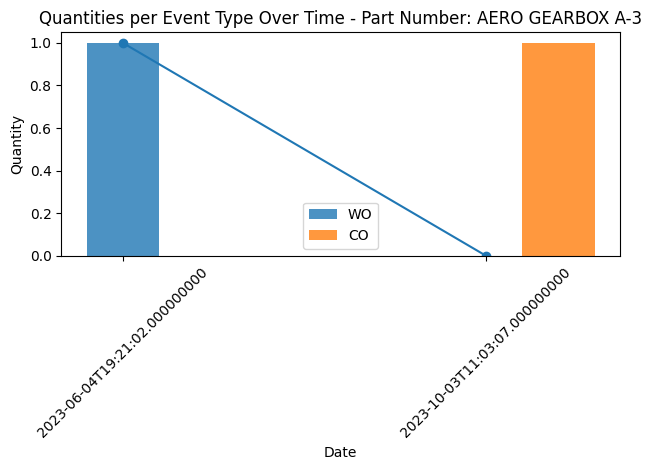

Initial part stock :  0


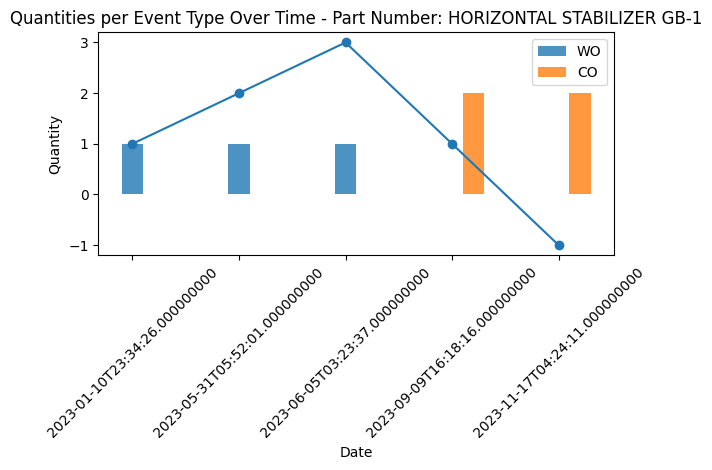

Initial part stock :  0


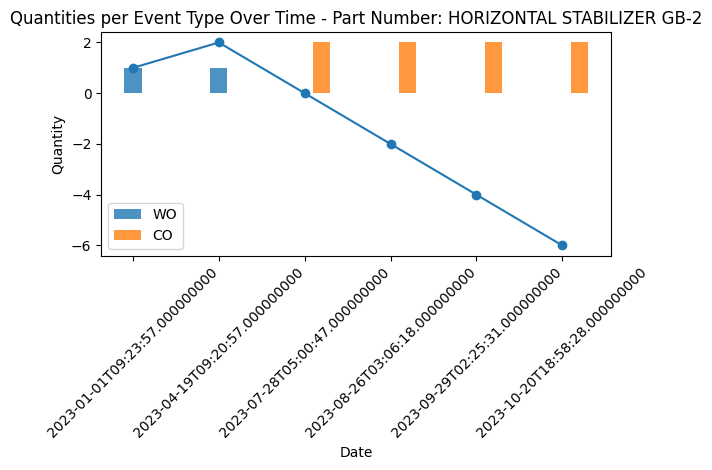

Initial part stock :  0


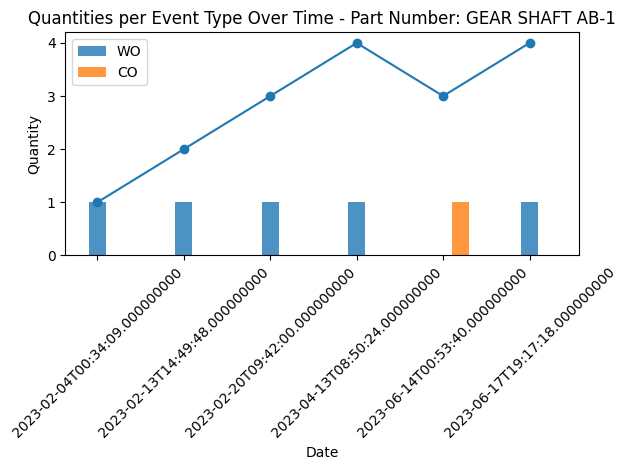

In [99]:
for part_name in parts.part_name.unique():
    plt = plot_all_part_events(all_parts_events, part_name)
    plt = plot_part_stock_trajectory_with_initial_stock(all_parts_events, part_name, plt)
    plt.show()

### Q14 : Are we able to deliver the customer orders on time ? What are the customer orders that wouldn’t be delivered on time ?


### Q15 : In order to deliver the Customer orders on-time,  What could be the actions to take ?


The problem is much complicated than that :

The work orders of the equipments are conditioned by the pieces availabilities.

### Q16 : What would be the new stock trajectories of the parts if we take into account that constraint ?

1 - Consumption events :

Create consumption events for equipements work orders

In [101]:
# Equipment work orders
equipment_orders = all_parts_events[all_parts_events.part_name.isin(equipment_names)]
equipment_work_orders = equipment_orders[equipment_orders.event_type=='WO']
equipment_work_orders

part_number                   part_name  order_number  \
0        232434            AERO GEARBOX A-1        752682   
1        232434            AERO GEARBOX A-1        275098   
2        232434            AERO GEARBOX A-1        292340   
3        232434            AERO GEARBOX A-1        602748   
4        547235            AERO GEARBOX A-2        884668   
5        547235            AERO GEARBOX A-2        583820   
6        547235            AERO GEARBOX A-2         80517   
7        547235            AERO GEARBOX A-2         63091   
8        547235            AERO GEARBOX A-2        486240   
9        986756            AERO GEARBOX A-3         76941   
10      7358645  HORIZONTAL STABILIZER GB-1        755765   
11      7358645  HORIZONTAL STABILIZER GB-1         48696   
12      7358645  HORIZONTAL STABILIZER GB-1        640011   
13       845343  HORIZONTAL STABILIZER GB-2        770356   
14       845343  HORIZONTAL STABILIZER GB-2        500493   
15       765465             GEAR SHAFT AB-1         73033   
16       765465             GEAR SHAFT AB-1        583069   
17       765465             GEAR SHAFT AB-1        463816   
18       765465             GEAR SHAFT AB-1        647543   
19       765465             GEAR SHAFT AB-1         36369   

                   date  quantity event_type  
0   2023-03-20 17:47:58         1         WO  
1   2023-02-22 01:44:17         1         WO  
2   2023-06-16 14:30:16         1         WO  
3   2023-04-07 19:33:36         1         WO  
4   2023-04-16 12:39:57         1         WO  
5   2023-04-15 18:07:39         1         WO  
6   2023-06-20 08:53:42         1         WO  
7   2023-01-13 12:33:27         1         WO  
8   2023-06-24 19:10:40         1         WO  
9   2023-06-04 19:21:02         1         WO  
10  2023-01-10 23:34:26         1         WO  
11  2023-05-31 05:52:01         1         WO  
12  2023-06-05 03:23:37         1         WO  
13  2023-01-01 09:23:57         1         WO  
14  2023-04-19 09:20:57         1         WO  
15  2023-02-13 14:49:48         1         WO  
16  2023-02-20 09:42:00         1         WO  
17  2023-04-13 08:50:24         1         WO  
18  2023-02-04 00:34:09         1         WO  
19  2023-06-17 19:17:18         1         WO

In [102]:
# helper function

# Get list of requirements per equipement
def get_requirement_per_equipment(equipment_name, requirements_df):
    return requirements_df[requirements_df.heading_part_name==equipment_name]

In [106]:
# Consumption orders

consumption_orders = []
for i, row in equipment_work_orders.iterrows():
    equipment_requirements = get_requirement_per_equipment(row.part_name, equipements_and_components)
    for j, r in equipment_requirements.iterrows():
        co = {'part_number': r.child_part_number, 'part_name': r.child_part_name, "quantity": -r.quantity, "date": row.date, "event_type": 'CONSO'}
        consumption_orders.append(co)
consumption_orders_df = pd.DataFrame(consumption_orders)
consumption_orders_df

part_number  part_name  quantity                 date event_type
0         67382   SCREW 12        -1  2023-03-20 17:47:58      CONSO
1         87329  NEEDLE X1        -4  2023-03-20 17:47:58      CONSO
2         87329    BOLT 21        -4  2023-03-20 17:47:58      CONSO
3        782332    SHAFT 1        -3  2023-03-20 17:47:58      CONSO
4         37832    SHAFT 3        -2  2023-03-20 17:47:58      CONSO
..          ...        ...       ...                  ...        ...
92      3298932  BEARING 4        -4  2023-02-04 00:34:09      CONSO
93       187281  SHAFT 112        -4  2023-06-17 19:17:18      CONSO
94       873872   RING 139        -2  2023-06-17 19:17:18      CONSO
95       778732  BEARING 2        -4  2023-06-17 19:17:18      CONSO
96      3298932  BEARING 4        -4  2023-06-17 19:17:18      CONSO

[97 rows x 5 columns]

In [107]:
# Concatenate consumption orders to all parts events
all_parts_events_with_conso = pd.concat([all_parts_events, consumption_orders_df])
all_parts_events_with_conso

part_number  part_name  order_number                 date  quantity  \
0         38783    BOLT 17       96596.0  2023-03-10 12:02:27         4   
1         38783    BOLT 17      810830.0  2023-07-10 09:57:03         4   
2         38783    BOLT 17      527148.0  2023-04-03 05:22:38         2   
3        983298     RING 4      383027.0  2023-03-14 17:03:58         9   
4        983298     RING 4       17449.0  2023-04-19 00:40:17         3   
..          ...        ...           ...                  ...       ...   
92      3298932  BEARING 4           NaN  2023-02-04 00:34:09        -4   
93       187281  SHAFT 112           NaN  2023-06-17 19:17:18        -4   
94       873872   RING 139           NaN  2023-06-17 19:17:18        -2   
95       778732  BEARING 2           NaN  2023-06-17 19:17:18        -4   
96      3298932  BEARING 4           NaN  2023-06-17 19:17:18        -4   

   event_type  
0          PO  
1          PO  
2          PO  
3          PO  
4          PO  
..        ...  
92      CONSO  
93      CONSO  
94      CONSO  
95      CONSO  
96      CONSO  

[262 rows x 6 columns]

/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Initial part stock :  6


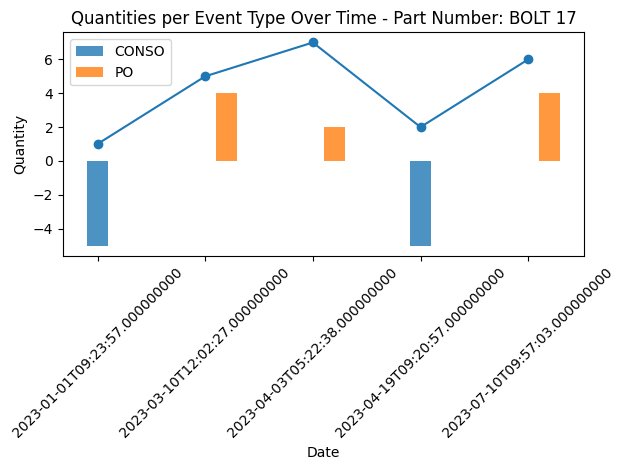

Initial part stock :  3


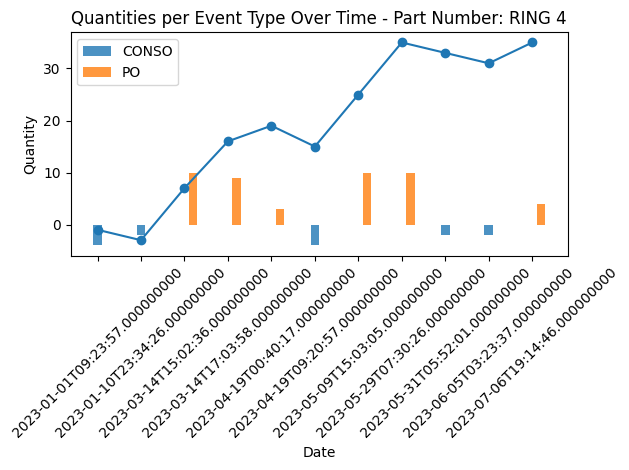

Initial part stock :  3


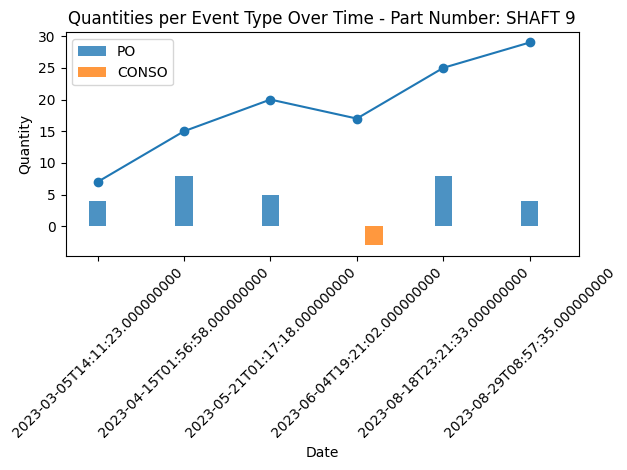

Initial part stock :  1


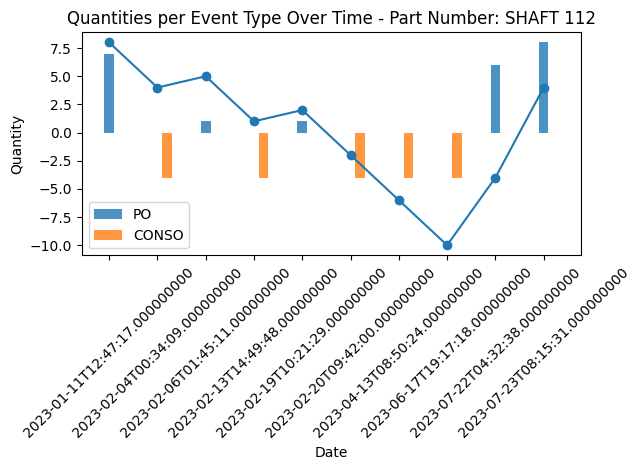

Initial part stock :  4


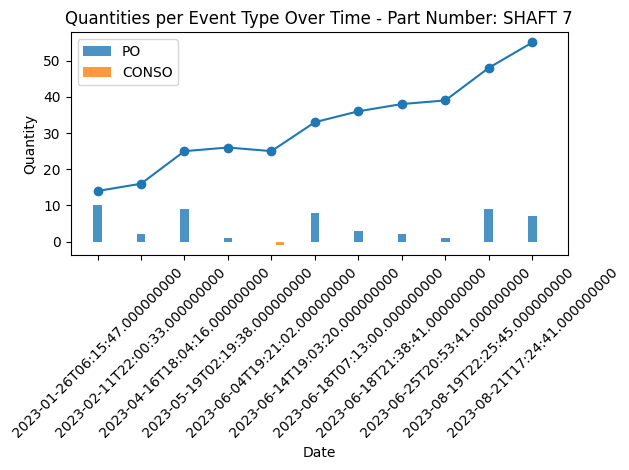

Initial part stock :  6


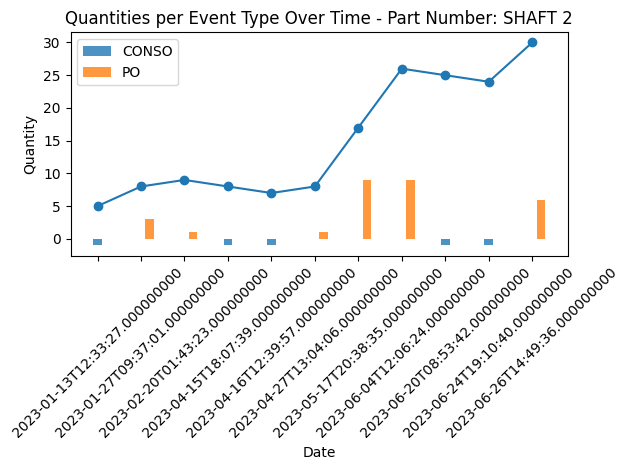

Initial part stock :  2


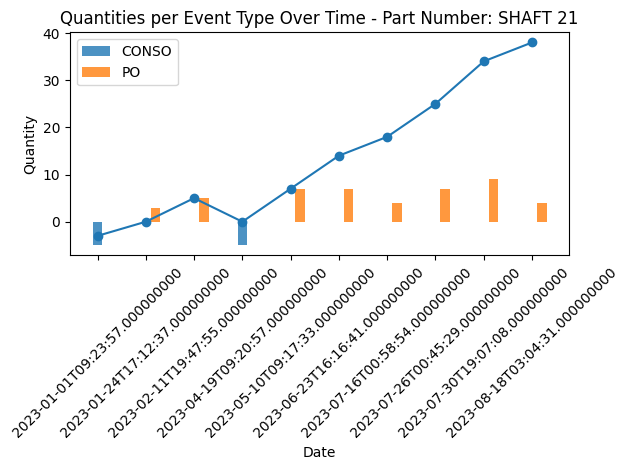

Initial part stock :  2


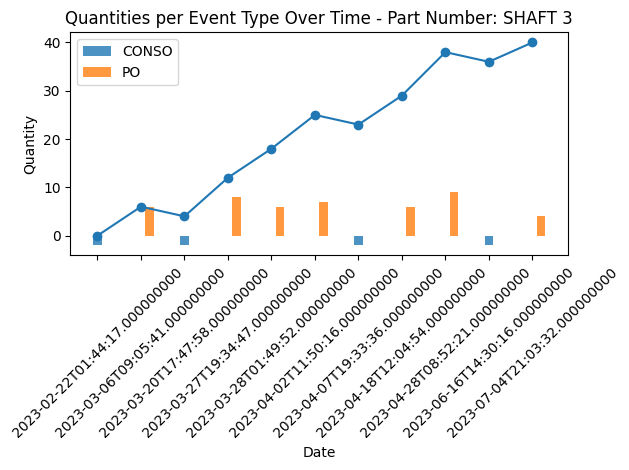

Initial part stock :  6


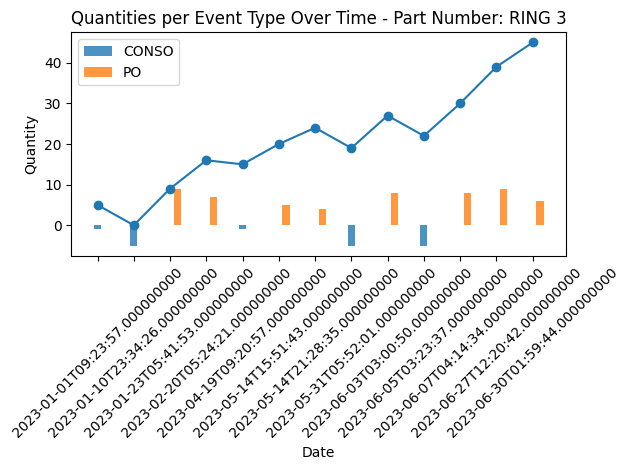

Initial part stock :  4


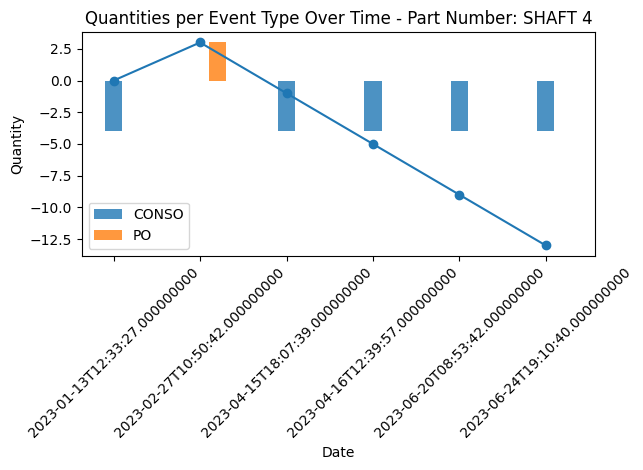

Initial part stock :  1


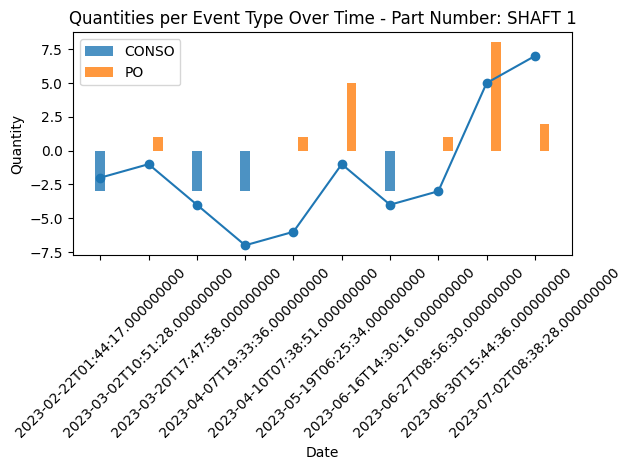

Initial part stock :  2


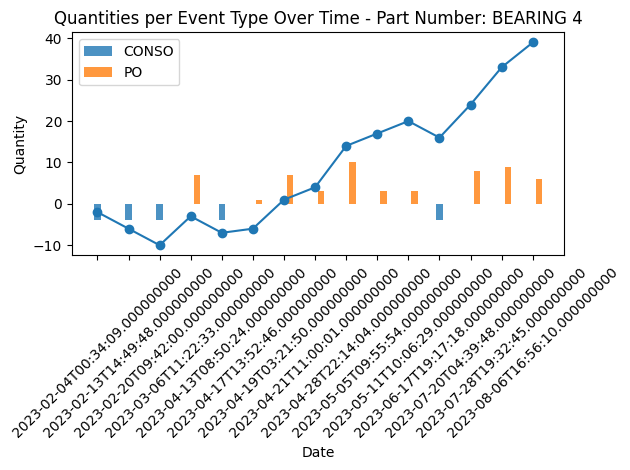

Initial part stock :  4


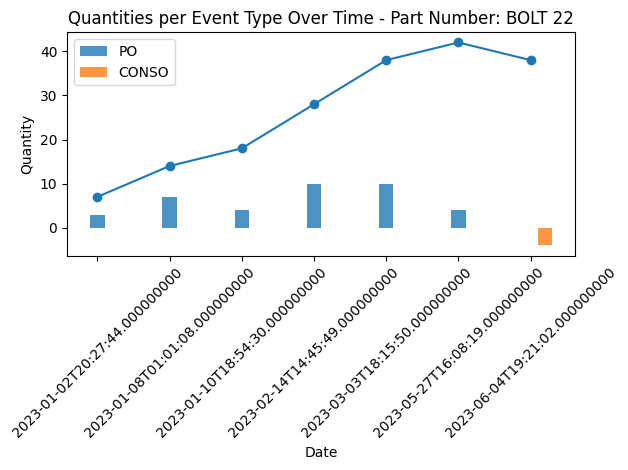

Initial part stock :  5


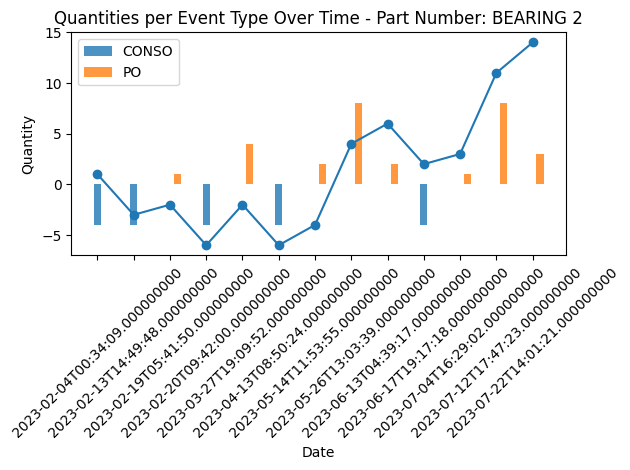

Initial part stock :  3


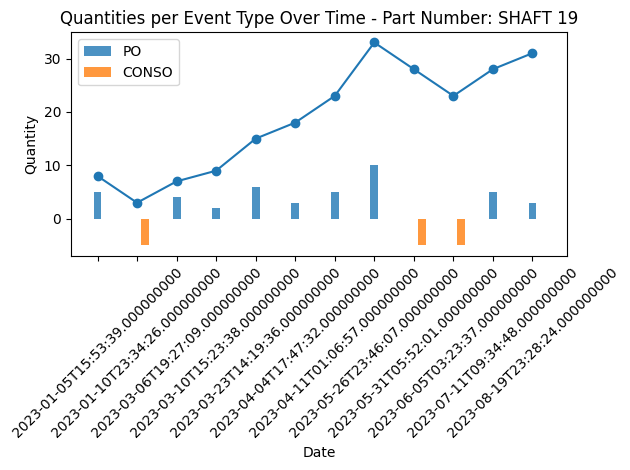

Initial part stock :  2


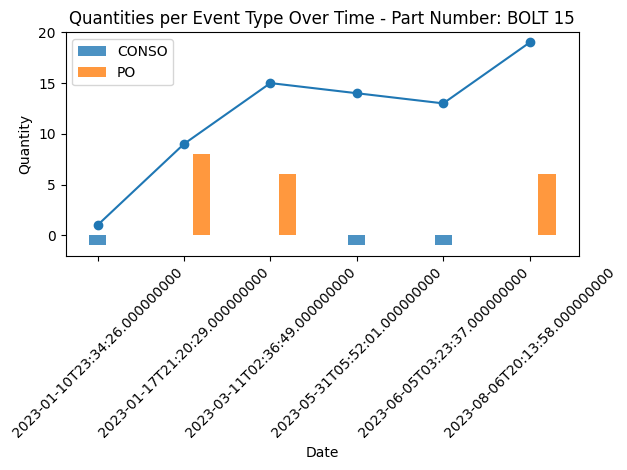

Initial part stock :  3


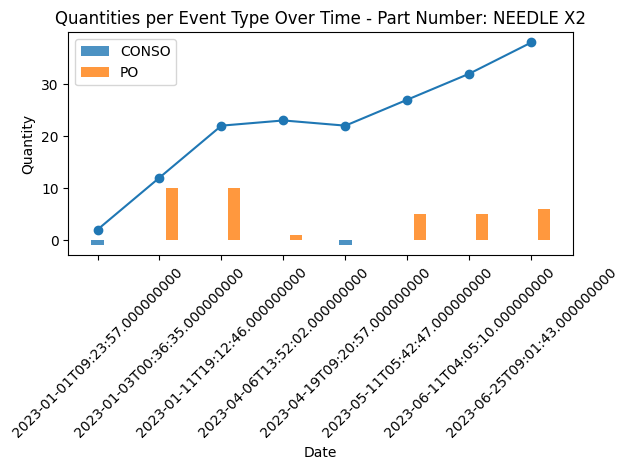

Initial part stock :  3


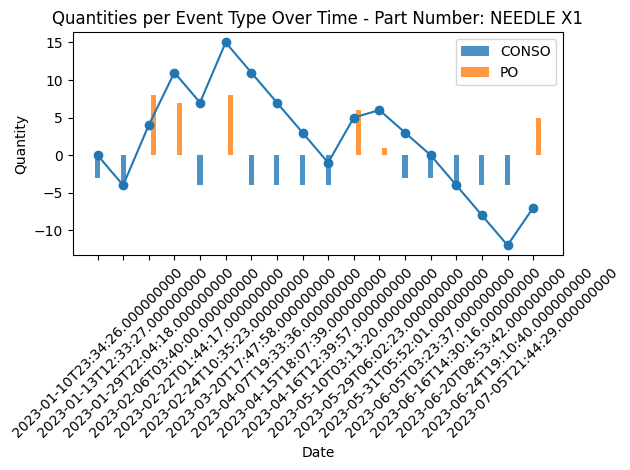

Initial part stock :  4


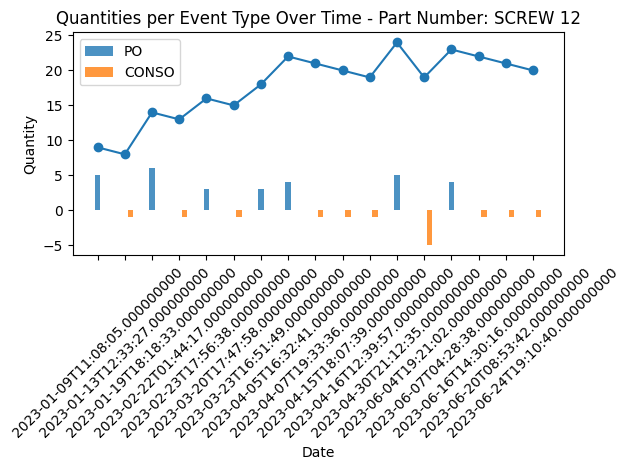

Initial part stock :  3


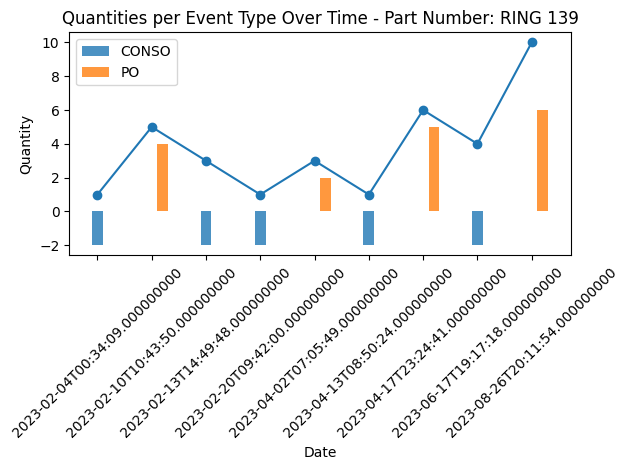

Initial part stock :  3


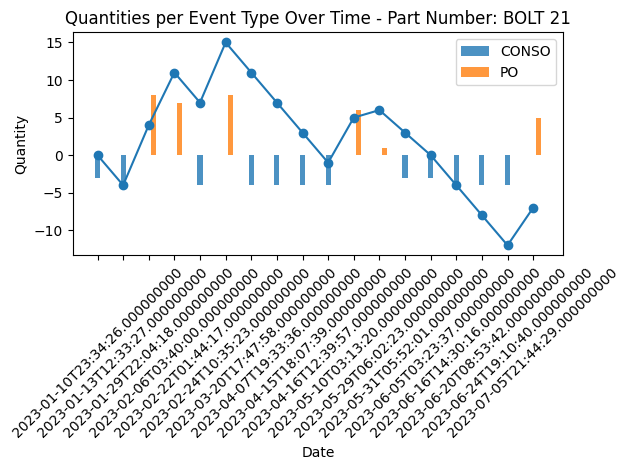

Initial part stock :  0


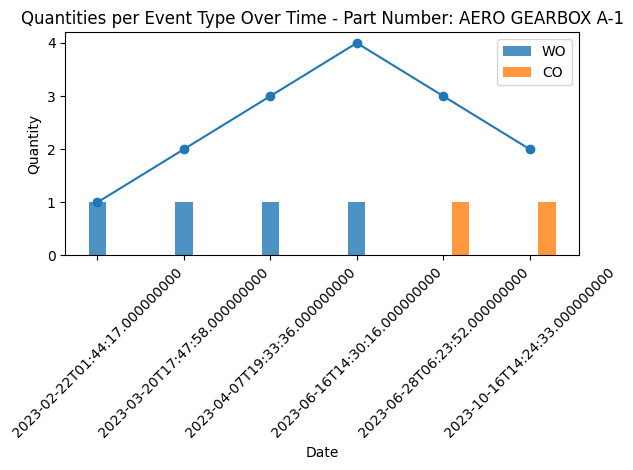

Initial part stock :  0


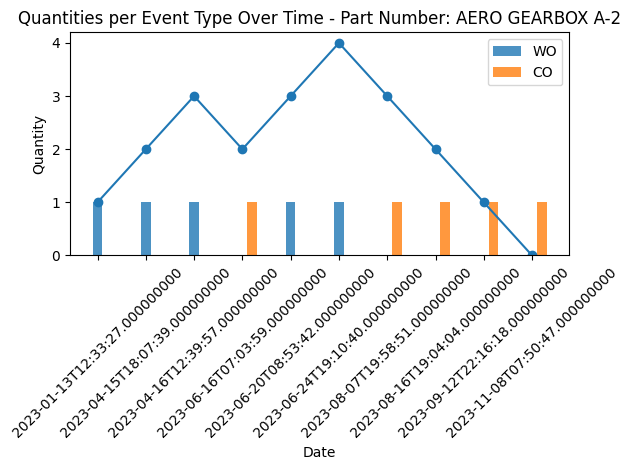

Initial part stock :  0


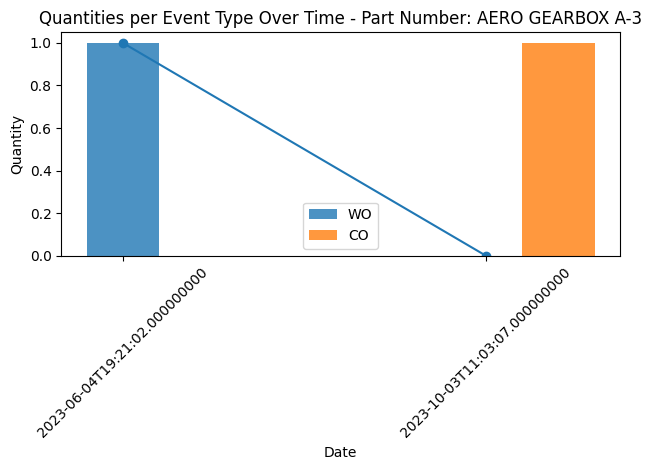

Initial part stock :  0


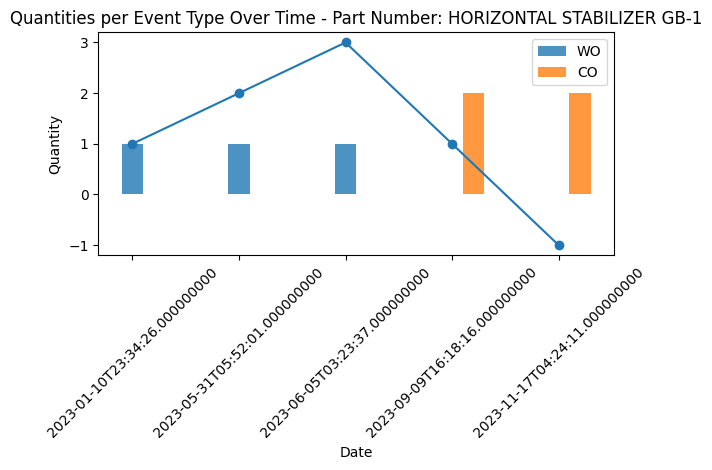

Initial part stock :  0


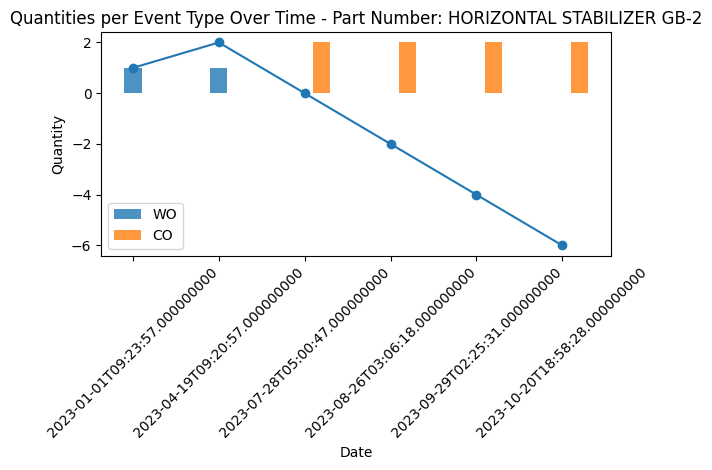

Initial part stock :  0


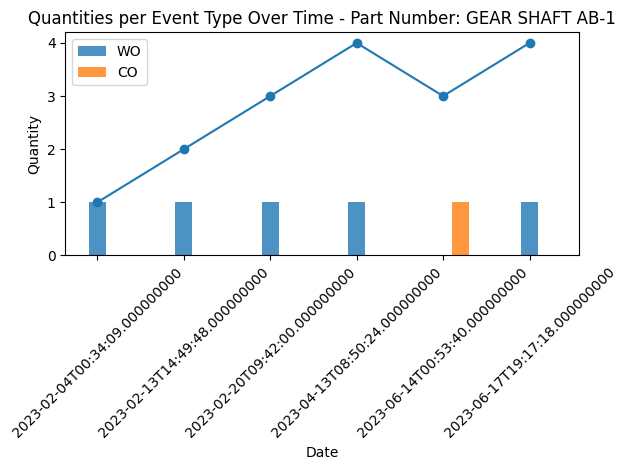

In [108]:
# plot new stock trajectory + consumption events :

for part_name in parts.part_name.unique():
    plt = plot_all_part_events(all_parts_events_with_conso, part_name)
    plt = plot_part_stock_trajectory_with_initial_stock(all_parts_events_with_conso, part_name, plt)
    plt.show()

### Q17 : Are we able to release all the work orders ?


In [110]:
equipment_work_orders

part_number                   part_name  order_number  \
0        232434            AERO GEARBOX A-1        752682   
1        232434            AERO GEARBOX A-1        275098   
2        232434            AERO GEARBOX A-1        292340   
3        232434            AERO GEARBOX A-1        602748   
4        547235            AERO GEARBOX A-2        884668   
5        547235            AERO GEARBOX A-2        583820   
6        547235            AERO GEARBOX A-2         80517   
7        547235            AERO GEARBOX A-2         63091   
8        547235            AERO GEARBOX A-2        486240   
9        986756            AERO GEARBOX A-3         76941   
10      7358645  HORIZONTAL STABILIZER GB-1        755765   
11      7358645  HORIZONTAL STABILIZER GB-1         48696   
12      7358645  HORIZONTAL STABILIZER GB-1        640011   
13       845343  HORIZONTAL STABILIZER GB-2        770356   
14       845343  HORIZONTAL STABILIZER GB-2        500493   
15       765465             GEAR SHAFT AB-1         73033   
16       765465             GEAR SHAFT AB-1        583069   
17       765465             GEAR SHAFT AB-1        463816   
18       765465             GEAR SHAFT AB-1        647543   
19       765465             GEAR SHAFT AB-1         36369   

                   date  quantity event_type  
0   2023-03-20 17:47:58         1         WO  
1   2023-02-22 01:44:17         1         WO  
2   2023-06-16 14:30:16         1         WO  
3   2023-04-07 19:33:36         1         WO  
4   2023-04-16 12:39:57         1         WO  
5   2023-04-15 18:07:39         1         WO  
6   2023-06-20 08:53:42         1         WO  
7   2023-01-13 12:33:27         1         WO  
8   2023-06-24 19:10:40         1         WO  
9   2023-06-04 19:21:02         1         WO  
10  2023-01-10 23:34:26         1         WO  
11  2023-05-31 05:52:01         1         WO  
12  2023-06-05 03:23:37         1         WO  
13  2023-01-01 09:23:57         1         WO  
14  2023-04-19 09:20:57         1         WO  
15  2023-02-13 14:49:48         1         WO  
16  2023-02-20 09:42:00         1         WO  
17  2023-04-13 08:50:24         1         WO  
18  2023-02-04 00:34:09         1         WO  
19  2023-06-17 19:17:18         1         WO

In [162]:
def add_stock_column_to_parts_events(all_part_events):
    all_part_events['date'] = pd.to_datetime(all_part_events['date'])
    all_part_events  = all_part_events.sort_values(by="date", ascending=True)
    all_part_events['stock'] = all_part_events.groupby('part_name')['quantity'].cumsum()
    all_part_events = all_part_events.sort_values(by=["part_number", "date"])
    return all_part_events

In [163]:
all_parts_events_with_conso = add_stock_column_to_parts_events(all_parts_events_with_conso)
all_parts_events_with_conso

part_number part_name  order_number                date  quantity  \
9         37832   SHAFT 3           NaN 2023-02-22 01:44:17        -2   
46        37832   SHAFT 3      163926.0 2023-03-06 09:05:41         6   
4         37832   SHAFT 3           NaN 2023-03-20 17:47:58        -2   
43        37832   SHAFT 3      232432.0 2023-03-27 19:34:47         8   
49        37832   SHAFT 3      533799.0 2023-03-28 01:49:52         6   
..          ...       ...           ...                 ...       ...   
10      9237832   SHAFT 9       61967.0 2023-04-15 01:56:58         8   
11      9237832   SHAFT 9       58465.0 2023-05-21 01:17:18         5   
48      9237832   SHAFT 9           NaN 2023-06-04 19:21:02        -3   
12      9237832   SHAFT 9      944342.0 2023-08-18 23:21:33         8   
13      9237832   SHAFT 9      883345.0 2023-08-29 08:57:35         4   

   event_type  stock  
9       CONSO     -2  
46         PO      4  
4       CONSO      2  
43         PO     10  
49         PO     16  
..        ...    ...  
10         PO     12  
11         PO     17  
48      CONSO     14  
12         PO     22  
13         PO     26  

[262 rows x 7 columns]

In [191]:
def get_initial_stock_of_part(initial_stock, parts_df, part_name):
    part_number = parts_df.part_name.values[0]
    initial_part_stock = 0
    if part_number in initial_stock.part_number.values:
        initial_part_stock = initial_stock[initial_stock.part_number==part_number].quantity.values[0]
    return initial_part_stock

In [192]:
def component_stock_trajectory_at_date(all_parts_events, part_name, date):
    all_parts_events = add_stock_column_to_parts_events(all_parts_events)
    part_events = all_parts_events[all_parts_events.part_name==part_name]
    stock_at_date = get_initial_stock_of_part(initial_stock, parts, part_name)
    if len(part_events[part_events.date==date].stock.values)==0:
        if len(part_events[part_events.date<=date].stock.values) > 0:
            stock_at_date = part_events[part_events.date<=date].stock.values[-1]
    else:
        stock_at_date = part_events[part_events.date==date].stock.values[0]
    return stock_at_date

In [198]:
def is_all_work_order_components_in_stock(all_parts_events, work_order):
    work_order_date = work_order.date
    work_order_part_name = work_order.part_name
    equipement_requirements = get_requirement_per_equipment(work_order_part_name,  equipements_and_components)
    for i, component_row in equipement_requirements.iterrows():
        component_name = component_row.child_part_name
        component_quantity = component_row.quantity
        if component_stock_trajectory_at_date(all_parts_events, component_name, work_order_date) < component_quantity:
            """
            print(f"Work order {work_order.order_number} of equipement {work_order_part_name} at date {work_order_date} is Blocked")
            """
            return False
    """
    print(f"Work order {work_order.order_number} of equipement {work_order_part_name} at date {work_order_date} can be releases")
    """
    return True


In [199]:
for i, wo in equipment_work_orders.iterrows():
    print(is_all_work_order_components_in_stock(all_parts_events, wo))

/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future 

False
False
True
False
False


/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future 

False
False
False
False
True
False
True
True
False
True
False
False
True
False
True


/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future 

#### Q18 : What work orders would be blocked ? and why ?

In [202]:
equipment_work_orders['status'] = equipment_work_orders.apply(lambda row: is_all_work_order_components_in_stock(all_parts_events_with_conso, row), axis=1)

/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/Users/fatineboujnouni/Desktop/data-workshop/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future 

In [203]:
equipment_work_orders

part_number                   part_name  order_number  \
0        232434            AERO GEARBOX A-1        752682   
1        232434            AERO GEARBOX A-1        275098   
2        232434            AERO GEARBOX A-1        292340   
3        232434            AERO GEARBOX A-1        602748   
4        547235            AERO GEARBOX A-2        884668   
5        547235            AERO GEARBOX A-2        583820   
6        547235            AERO GEARBOX A-2         80517   
7        547235            AERO GEARBOX A-2         63091   
8        547235            AERO GEARBOX A-2        486240   
9        986756            AERO GEARBOX A-3         76941   
10      7358645  HORIZONTAL STABILIZER GB-1        755765   
11      7358645  HORIZONTAL STABILIZER GB-1         48696   
12      7358645  HORIZONTAL STABILIZER GB-1        640011   
13       845343  HORIZONTAL STABILIZER GB-2        770356   
14       845343  HORIZONTAL STABILIZER GB-2        500493   
15       765465             GEAR SHAFT AB-1         73033   
16       765465             GEAR SHAFT AB-1        583069   
17       765465             GEAR SHAFT AB-1        463816   
18       765465             GEAR SHAFT AB-1        647543   
19       765465             GEAR SHAFT AB-1         36369   

                   date  quantity event_type  status  
0   2023-03-20 17:47:58         1         WO   False  
1   2023-02-22 01:44:17         1         WO   False  
2   2023-06-16 14:30:16         1         WO   False  
3   2023-04-07 19:33:36         1         WO   False  
4   2023-04-16 12:39:57         1         WO   False  
5   2023-04-15 18:07:39         1         WO   False  
6   2023-06-20 08:53:42         1         WO   False  
7   2023-01-13 12:33:27         1         WO   False  
8   2023-06-24 19:10:40         1         WO   False  
9   2023-06-04 19:21:02         1         WO    True  
10  2023-01-10 23:34:26         1         WO   False  
11  2023-05-31 05:52:01         1         WO   False  
12  2023-06-05 03:23:37         1         WO   False  
13  2023-01-01 09:23:57         1         WO   False  
14  2023-04-19 09:20:57         1         WO   False  
15  2023-02-13 14:49:48         1         WO   False  
16  2023-02-20 09:42:00         1         WO   False  
17  2023-04-13 08:50:24         1         WO   False  
18  2023-02-04 00:34:09         1         WO   False  
19  2023-06-17 19:17:18         1         WO   False